# Population Ireland

Import libraries

In [1245]:
import pandas as pd
import numpy as np
import os 
import seaborn as  sns
import math
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 
import scipy.stats as ss
from scipy.special import comb

According to the recent classes of the last week I install plotly to be able to make my visualization graphs more dynamic 

In [1246]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1247]:
import plotly.express as px

# Import DataBases

In [1248]:
PEA=pd.read_csv("Population Estimates Age Group 1950-2023.csv")
AP=pd.read_csv("Annual Population Change 1950-2023.csv")
 #Additional databases (Ireland is a multicultural country so in the same webside I found a statistic about Non-Irish citizens in Ireland 2022, I think it is interesting to see the nationalities that predominate in the country since I am analyzing the population in the country. )
NIC=pd.read_csv("Non-Irish citizens usually resident and present in the State by country of citizenship 2022 EXTRA.csv")

# Population Estimates Age Group 1950-2023

In this base I have the information on the population from 1950 to 2023, first I visualize my base and how my information comes

# Analyzing DataSet

In [1249]:
PEA.head()

,STATISTIC,Year,Sex,UNIT,Under 1 year,0 - 4 years,0 - 14 years,1 - 4 years,5 - 9 years,10 - 14 years,...,50 - 54 years,55 - 59 years,60 - 64 years,65 - 69 years,65 years and over,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages
0,Population Estimates (Persons in April),1950,Both sexes,Thousand,61.1,NaN,851.2,249.1,278.9,262.1,...,158.4,130.4,121.9,109.3,317.1,100.4,64.0,30.1,13.3,2969.0
1,Population Estimates (Persons in April),1950,Male,Thousand,31.4,NaN,434.6,127.5,142.3,133.4,...,80.6,65.8,61.3,55.2,155.8,49.5,31.4,14.2,5.5,1510.0
2,Population Estimates (Persons in April),1950,Female,Thousand,29.7,NaN,416.6,121.6,136.6,128.7,...,77.8,64.6,60.6,54.1,161.3,50.9,32.6,15.9,7.8,1459.0
3,Population Estimates (Persons in April),1951,Both sexes,Thousand,63.6,312.9,854.8,249.3,281.0,260.9,...,163.0,128.8,122.1,107.5,316.4,100.1,64.6,30.9,13.3,2960.6
4,Population Estimates (Persons in April),1951,Male,Thousand,32.6,160.0,436.4,127.6,143.5,132.7,...,82.9,65.0,61.3,54.1,155.0,49.1,31.6,14.6,5.5,1506.6


In [1250]:
PEA.shape

(222, 31)

In [1251]:
PEA.info

<bound method DataFrame.info of                                    STATISTIC  Year         Sex      UNIT  \
0    Population Estimates (Persons in April)  1950  Both sexes  Thousand   
1    Population Estimates (Persons in April)  1950        Male  Thousand   
2    Population Estimates (Persons in April)  1950      Female  Thousand   
3    Population Estimates (Persons in April)  1951  Both sexes  Thousand   
4    Population Estimates (Persons in April)  1951        Male  Thousand   
..                                       ...   ...         ...       ...   
217  Population Estimates (Persons in April)  2022        Male  Thousand   
218  Population Estimates (Persons in April)  2022      Female  Thousand   
219  Population Estimates (Persons in April)  2023  Both sexes  Thousand   
220  Population Estimates (Persons in April)  2023        Male  Thousand   
221  Population Estimates (Persons in April)  2023      Female  Thousand   

     Under 1 year  0 - 4 years  0 - 14 years  1 - 4 yea

In [1252]:
PEA.describe

<bound method NDFrame.describe of                                    STATISTIC  Year         Sex      UNIT  \
0    Population Estimates (Persons in April)  1950  Both sexes  Thousand   
1    Population Estimates (Persons in April)  1950        Male  Thousand   
2    Population Estimates (Persons in April)  1950      Female  Thousand   
3    Population Estimates (Persons in April)  1951  Both sexes  Thousand   
4    Population Estimates (Persons in April)  1951        Male  Thousand   
..                                       ...   ...         ...       ...   
217  Population Estimates (Persons in April)  2022        Male  Thousand   
218  Population Estimates (Persons in April)  2022      Female  Thousand   
219  Population Estimates (Persons in April)  2023  Both sexes  Thousand   
220  Population Estimates (Persons in April)  2023        Male  Thousand   
221  Population Estimates (Persons in April)  2023      Female  Thousand   

     Under 1 year  0 - 4 years  0 - 14 years  1 - 4 y

In [1253]:
PEA.describe(include=object) 

,STATISTIC,Sex,UNIT
count,222,222,222
unique,1,3,1
top,Population Estimates (Persons in April),Both sexes,Thousand
freq,222,74,222


In [1254]:
PEA.dtypes

STATISTIC             object
Year                   int64
Sex                   object
UNIT                  object
Under 1 year         float64
0 - 4 years          float64
0 - 14 years         float64
1 - 4 years          float64
5 - 9 years          float64
10 - 14 years        float64
15 - 19 years        float64
15 - 24 years        float64
15 years and over    float64
20 - 24 years        float64
25 - 29 years        float64
25 - 44 years        float64
30 - 34 years        float64
35 - 39 years        float64
40 - 44 years        float64
45 - 49 years        float64
45 - 64 years        float64
50 - 54 years        float64
55 - 59 years        float64
60 - 64 years        float64
65 - 69 years        float64
65 years and over    float64
70 - 74 years        float64
75 - 79 years        float64
80 - 84 years        float64
85 years and over    float64
All ages             float64
dtype: object

With previous queries there are garbage columns, which only dirty my information, so I will proceed to eliminate them.

Also detect that there are missing data in a column

In [1255]:
PEA = PEA.drop(columns=['STATISTIC','UNIT',])

PEA.head()

,Year,Sex,Under 1 year,0 - 4 years,0 - 14 years,1 - 4 years,5 - 9 years,10 - 14 years,15 - 19 years,15 - 24 years,...,50 - 54 years,55 - 59 years,60 - 64 years,65 - 69 years,65 years and over,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages
0,1950,Both sexes,61.1,NaN,851.2,249.1,278.9,262.1,244.0,452.6,...,158.4,130.4,121.9,109.3,317.1,100.4,64.0,30.1,13.3,2969.0
1,1950,Male,31.4,NaN,434.6,127.5,142.3,133.4,126.6,234.9,...,80.6,65.8,61.3,55.2,155.8,49.5,31.4,14.2,5.5,1510.0
2,1950,Female,29.7,NaN,416.6,121.6,136.6,128.7,117.4,217.7,...,77.8,64.6,60.6,54.1,161.3,50.9,32.6,15.9,7.8,1459.0
3,1951,Both sexes,63.6,312.9,854.8,249.3,281.0,260.9,241.2,443.4,...,163.0,128.8,122.1,107.5,316.4,100.1,64.6,30.9,13.3,2960.6
4,1951,Male,32.6,160.0,436.4,127.6,143.5,132.7,125.7,231.1,...,82.9,65.0,61.3,54.1,155.0,49.1,31.6,14.6,5.5,1506.6


# Missing data

I already eliminated the columns that were not useful to me and I already saw that the information of my missing data is qualitative, specifically they should be float.

I also already confirmed that the missing information are visible errors

Reviewing the information I see that there are two ways to complete the information;
1st is imputing 
2nd add a column with an operation (Since by reviewing the column you have a column that has the total information if you subtract that of other columns)

# First option: Imputing

I created a copy to be able to work on the second option

In [1256]:
PEA_1=PEA.copy()

In [1257]:
print(PEA_1['0 - 4 years'].head())

0      NaN
1      NaN
2      NaN
3    312.9
4    160.0
Name: 0 - 4 years, dtype: float64


Continue with the steps in Mark missing values, using isnull and not null

In [1258]:
print(PEA_1['0 - 4 years'].isnull().head())

0     True
1     True
2     True
3    False
4    False
Name: 0 - 4 years, dtype: bool


In [1259]:
print(PEA_1['0 - 4 years'].notnull().head())

0    False
1    False
2    False
3     True
4     True
Name: 0 - 4 years, dtype: bool


In [1260]:
null_filter = PEA_1['0 - 4 years'].isnull()
null_filter is False
print(PEA_1[null_filter]) 

False

     Year         Sex  Under 1 year  0 - 4 years  0 - 14 years  1 - 4 years  \
0    1950  Both sexes          61.1          NaN         851.2        249.1   
1    1950        Male          31.4          NaN         434.6        127.5   
2    1950      Female          29.7          NaN         416.6        121.6   
6    1952  Both sexes          61.9          NaN         859.6        248.4   
7    1952        Male          31.5          NaN         438.8        127.2   
..    ...         ...           ...          ...           ...          ...   
133  1994        Male          25.2          NaN         462.4        108.9   
134  1994      Female          23.6          NaN         436.4        102.6   
135  1995  Both sexes          48.2          NaN         878.0        207.3   
136  1995        Male          24.9          NaN         451.3        106.7   
137  1995      Female          23.3          NaN         426.5        100.6   

     5 - 9 years  10 - 14 years  15 - 19 years  15 

To check if there are any missing values in the data
frame and total

In [1261]:
print(PEA_1.isnull().values.any())

True


I verified that 114 data are missing 

In [1262]:
print(PEA_1.isnull().sum())

Year                   0
Sex                    0
Under 1 year           0
0 - 4 years          114
0 - 14 years           0
1 - 4 years            0
5 - 9 years            0
10 - 14 years          0
15 - 19 years          0
15 - 24 years          0
15 years and over      0
20 - 24 years          0
25 - 29 years          0
25 - 44 years          0
30 - 34 years          0
35 - 39 years          0
40 - 44 years          0
45 - 49 years          0
45 - 64 years          0
50 - 54 years          0
55 - 59 years          0
60 - 64 years          0
65 - 69 years          0
65 years and over      0
70 - 74 years          0
75 - 79 years          0
80 - 84 years          0
85 years and over      0
All ages               0
dtype: int64


Imputing Missing Values in the Dataset.


I chose to replace NaN with a single constant value since looking at the rows it is seen that there is a contrast between the years and to be able to better see the results when graphing

In [1263]:
PEA_1['0 - 4 years'].fillna(0, inplace=True)

print(PEA_1['0 - 4 years'].head()) 

0      0.0
1      0.0
2      0.0
3    312.9
4    160.0
Name: 0 - 4 years, dtype: float64


In [1264]:
print(PEA_1.isnull().sum())

Year                 0
Sex                  0
Under 1 year         0
0 - 4 years          0
0 - 14 years         0
1 - 4 years          0
5 - 9 years          0
10 - 14 years        0
15 - 19 years        0
15 - 24 years        0
15 years and over    0
20 - 24 years        0
25 - 29 years        0
25 - 44 years        0
30 - 34 years        0
35 - 39 years        0
40 - 44 years        0
45 - 49 years        0
45 - 64 years        0
50 - 54 years        0
55 - 59 years        0
60 - 64 years        0
65 - 69 years        0
65 years and over    0
70 - 74 years        0
75 - 79 years        0
80 - 84 years        0
85 years and over    0
All ages             0
dtype: int64


I have checked that I no longer have any missing data thanks to the code I have created

# Second option: Math operation


By reviewing the name of the columns I have the information of 'Under 1 year' and '1 - 4 years' so by adding these two columns I can get the information from the missing column ("0 - 4 years")with the exact data I require.

For that I will first make a comparison to see if the theory is correct and the data that I already have in the column is the result of the sum of those 2 data.

In [1265]:
PEA['0 - 4'] = PEA['Under 1 year']+PEA['1 - 4 years']
PEA.head()

,Year,Sex,Under 1 year,0 - 4 years,0 - 14 years,1 - 4 years,5 - 9 years,10 - 14 years,15 - 19 years,15 - 24 years,...,55 - 59 years,60 - 64 years,65 - 69 years,65 years and over,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages,0 - 4
0,1950,Both sexes,61.1,NaN,851.2,249.1,278.9,262.1,244.0,452.6,...,130.4,121.9,109.3,317.1,100.4,64.0,30.1,13.3,2969.0,310.2
1,1950,Male,31.4,NaN,434.6,127.5,142.3,133.4,126.6,234.9,...,65.8,61.3,55.2,155.8,49.5,31.4,14.2,5.5,1510.0,158.9
2,1950,Female,29.7,NaN,416.6,121.6,136.6,128.7,117.4,217.7,...,64.6,60.6,54.1,161.3,50.9,32.6,15.9,7.8,1459.0,151.3
3,1951,Both sexes,63.6,312.9,854.8,249.3,281.0,260.9,241.2,443.4,...,128.8,122.1,107.5,316.4,100.1,64.6,30.9,13.3,2960.6,312.9
4,1951,Male,32.6,160.0,436.4,127.6,143.5,132.7,125.7,231.1,...,65.0,61.3,54.1,155.0,49.1,31.6,14.6,5.5,1506.6,160.2


In [1266]:
PEA['comparison'] = PEA['0 - 4 years']==PEA['0 - 4']
PEA.head()

,Year,Sex,Under 1 year,0 - 4 years,0 - 14 years,1 - 4 years,5 - 9 years,10 - 14 years,15 - 19 years,15 - 24 years,...,60 - 64 years,65 - 69 years,65 years and over,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages,0 - 4,comparison
0,1950,Both sexes,61.1,NaN,851.2,249.1,278.9,262.1,244.0,452.6,...,121.9,109.3,317.1,100.4,64.0,30.1,13.3,2969.0,310.2,False
1,1950,Male,31.4,NaN,434.6,127.5,142.3,133.4,126.6,234.9,...,61.3,55.2,155.8,49.5,31.4,14.2,5.5,1510.0,158.9,False
2,1950,Female,29.7,NaN,416.6,121.6,136.6,128.7,117.4,217.7,...,60.6,54.1,161.3,50.9,32.6,15.9,7.8,1459.0,151.3,False
3,1951,Both sexes,63.6,312.9,854.8,249.3,281.0,260.9,241.2,443.4,...,122.1,107.5,316.4,100.1,64.6,30.9,13.3,2960.6,312.9,False
4,1951,Male,32.6,160.0,436.4,127.6,143.5,132.7,125.7,231.1,...,61.3,54.1,155.0,49.1,31.6,14.6,5.5,1506.6,160.2,False


In [1267]:
PEA['comparison'].value_counts().get(True, 0)

61

In [1268]:
(222-114)

108

I see that only 61 of the 108 values I have in that column match, so I will continue adding another column to corroborate that the difference is less than 1, if it is less than 1 I will confirm that my theory is correct and I will opt for option 2 to leave my values in the base, since they are more accurate values.

In [1269]:
PEA['comparison#'] = PEA['0 - 4 years']-PEA['0 - 4']

In [1270]:
PEA['>1'] = np.where(PEA['comparison#']>1,1,0)

In [1271]:
PEA['>1'].value_counts()
PEA

0    222
Name: >1, dtype: int64

,Year,Sex,Under 1 year,0 - 4 years,0 - 14 years,1 - 4 years,5 - 9 years,10 - 14 years,15 - 19 years,15 - 24 years,...,65 years and over,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages,0 - 4,comparison,comparison#,>1
0,1950,Both sexes,61.1,NaN,851.2,249.1,278.9,262.1,244.0,452.6,...,317.1,100.4,64.0,30.1,13.3,2969.0,310.2,False,NaN,0
1,1950,Male,31.4,NaN,434.6,127.5,142.3,133.4,126.6,234.9,...,155.8,49.5,31.4,14.2,5.5,1510.0,158.9,False,NaN,0
2,1950,Female,29.7,NaN,416.6,121.6,136.6,128.7,117.4,217.7,...,161.3,50.9,32.6,15.9,7.8,1459.0,151.3,False,NaN,0
3,1951,Both sexes,63.6,312.9,854.8,249.3,281.0,260.9,241.2,443.4,...,316.4,100.1,64.6,30.9,13.3,2960.6,312.9,False,-5.684342e-14,0
4,1951,Male,32.6,160.0,436.4,127.6,143.5,132.7,125.7,231.1,...,155.0,49.1,31.6,14.6,5.5,1506.6,160.2,False,-2.000000e-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022,Male,29.5,151.6,519.0,122.0,175.9,191.5,172.6,330.6,...,368.2,100.2,74.1,43.7,31.6,2562.0,151.5,False,1.000000e-01,0
218,2022,Female,28.1,144.2,495.3,116.1,167.7,183.4,165.1,319.1,...,413.1,104.5,80.9,53.0,52.8,2622.0,144.2,True,0.000000e+00,0
219,2023,Both sexes,55.7,293.8,1011.6,238.1,338.6,379.2,349.5,667.2,...,806.3,210.5,162.1,101.8,87.1,5281.6,293.8,True,0.000000e+00,0
220,2023,Male,27.4,149.2,516.5,121.8,173.4,193.9,178.7,340.0,...,379.9,102.6,77.8,46.1,33.1,2606.2,149.2,True,0.000000e+00,0


After reviewing these checks, the result is that of the 108 data that I have in the column, 61 correspond to the theory of the sum of the 2 columns and those that have a difference are by figures less than one, so the theory is correct and can be used to fill in missing data

I will continue with the elimination of the columns that were added for the checks and the column with missing data, leaving the new one with the total data

In [1272]:
PEA= PEA.drop(columns=['0 - 4 years','comparison','comparison#','>1',])

PEA.head()


,Year,Sex,Under 1 year,0 - 14 years,1 - 4 years,5 - 9 years,10 - 14 years,15 - 19 years,15 - 24 years,15 years and over,...,55 - 59 years,60 - 64 years,65 - 69 years,65 years and over,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages,0 - 4
0,1950,Both sexes,61.1,851.2,249.1,278.9,262.1,244.0,452.6,2117.8,...,130.4,121.9,109.3,317.1,100.4,64.0,30.1,13.3,2969.0,310.2
1,1950,Male,31.4,434.6,127.5,142.3,133.4,126.6,234.9,1075.4,...,65.8,61.3,55.2,155.8,49.5,31.4,14.2,5.5,1510.0,158.9
2,1950,Female,29.7,416.6,121.6,136.6,128.7,117.4,217.7,1042.4,...,64.6,60.6,54.1,161.3,50.9,32.6,15.9,7.8,1459.0,151.3
3,1951,Both sexes,63.6,854.8,249.3,281.0,260.9,241.2,443.4,2105.8,...,128.8,122.1,107.5,316.4,100.1,64.6,30.9,13.3,2960.6,312.9
4,1951,Male,32.6,436.4,127.6,143.5,132.7,125.7,231.1,1070.2,...,65.0,61.3,54.1,155.0,49.1,31.6,14.6,5.5,1506.6,160.2


# Population over the years

In my first analysis I would like to look at the population over the years so I will only work with totals and both sexes.

In [1273]:
PEA_t = PEA[['Year','Sex','All ages']]
PEA_t

,Year,Sex,All ages
0,1950,Both sexes,2969.0
1,1950,Male,1510.0
2,1950,Female,1459.0
3,1951,Both sexes,2960.6
4,1951,Male,1506.6
...,...,...,...
217,2022,Male,2562.0
218,2022,Female,2622.0
219,2023,Both sexes,5281.6
220,2023,Male,2606.2


In [1274]:
Population= PEA_t[PEA_t["Sex"]=="Both sexes"]
Population

,Year,Sex,All ages
0,1950,Both sexes,2969.0
3,1951,Both sexes,2960.6
6,1952,Both sexes,2952.9
9,1953,Both sexes,2949.0
12,1954,Both sexes,2941.2
...,...,...,...
207,2019,Both sexes,4958.5
210,2020,Both sexes,5029.9
213,2021,Both sexes,5074.7
216,2022,Both sexes,5184.0


In [1275]:
Population=Population.rename (columns= {'All ages':'Population'})
Population.head()

,Year,Sex,Population
0,1950,Both sexes,2969.0
3,1951,Both sexes,2960.6
6,1952,Both sexes,2952.9
9,1953,Both sexes,2949.0
12,1954,Both sexes,2941.2


In [1276]:
PopulationSE=Population

I consider that dot plots are the best graph to appreciate the change in population over the years, so I will plot with plot.

In [1277]:
#Matlplotlab

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Population')

Text(0.5, 1.0, 'Population over the years')

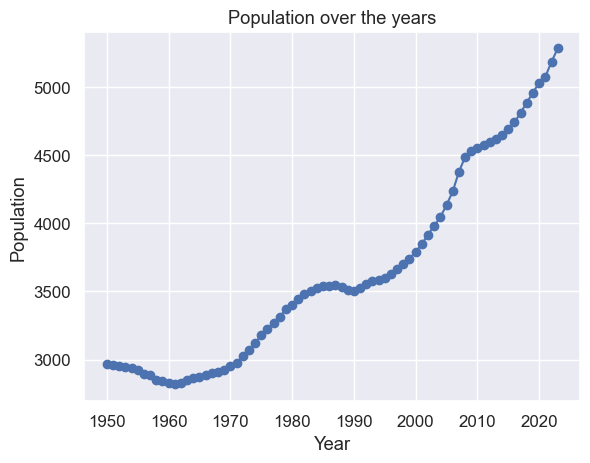

In [1278]:
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population over the years')
plt.plot(Population['Year'], Population['Population'], marker='o', linestyle='-')

Finally the bar graph is not suitable to represent the change in the population over the years since it is more for visualizing quantities but I would like to see the results

In [1279]:
x = Population['Year']
y = Population['Population']

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Population')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

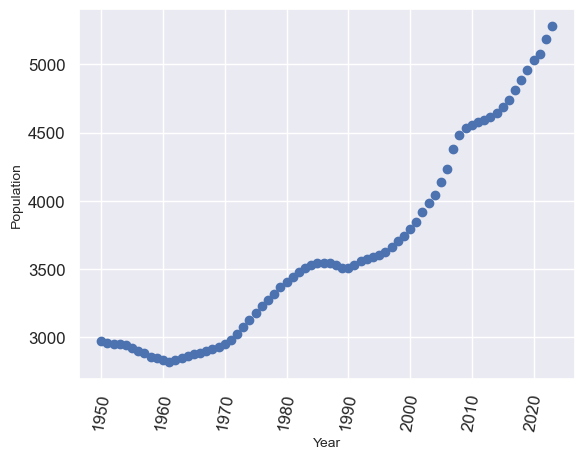

In [1280]:
plt.xlabel('Year',fontsize=10)
plt.ylabel('Population',fontsize=10)
plt.xticks(rotation=80)
plt.scatter(x,y)

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Population')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<BarContainer object of 74 artists>

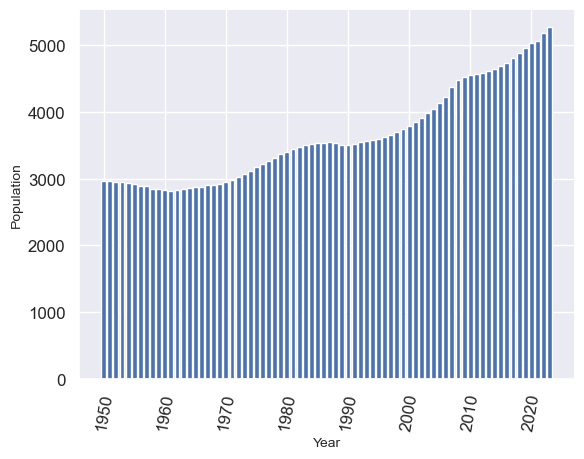

In [1281]:
plt.xlabel('Year',fontsize=10)
plt.ylabel('Population',fontsize=10)
plt.xticks(rotation=80)

plt.bar(x,y)

I confirm that the bar graph and scatter do not correspond to this analysis

Mean Population

In [1282]:
Population['Population'].mean()

3641.3229729729724

<Axes: xlabel='Population'>

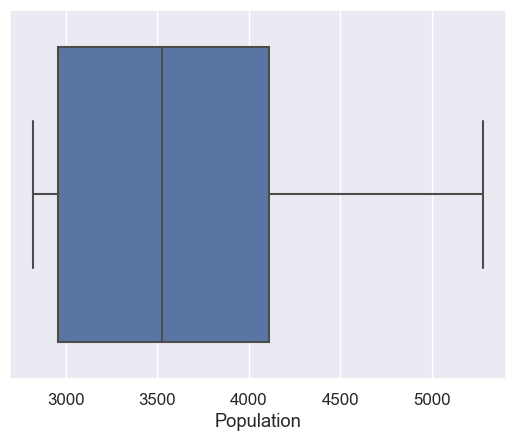

In [1283]:
sns.boxplot(x=Population["Population"])

I will save the information on the 2022 population for the analysis of my 3rd csv

In [1284]:
Population

,Year,Sex,Population
0,1950,Both sexes,2969.0
3,1951,Both sexes,2960.6
6,1952,Both sexes,2952.9
9,1953,Both sexes,2949.0
12,1954,Both sexes,2941.2
...,...,...,...
207,2019,Both sexes,4958.5
210,2020,Both sexes,5029.9
213,2021,Both sexes,5074.7
216,2022,Both sexes,5184.0


In [1285]:
Population.iloc[72:73,0:3]

,Year,Sex,Population
216,2022,Both sexes,5184.0


In [1286]:
Population_2022=5184

Checked the max population in Ireland

In [1287]:
Population['Population'].max()

5281.6

# Supervised machine learning technique 

In [1288]:
from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

In [1289]:
PopulationSE.head()

,Year,Sex,Population
0,1950,Both sexes,2969.0
3,1951,Both sexes,2960.6
6,1952,Both sexes,2952.9
9,1953,Both sexes,2949.0
12,1954,Both sexes,2941.2


In [1290]:
PopulationML = PopulationSE.drop('Sex',axis=1)

In [1291]:
PopulationML.nunique(axis = 0)

Year          74
Population    74
dtype: int64

In [1292]:
## Correlation between Features
correlation = PopulationSE.corr()
print(correlation)

                Year  Population
Year        1.000000    0.952975
Population  0.952975    1.000000


In [1293]:
## Scaling

scaler = StandardScaler()

PopulationML_scale = pd.DataFrame(scaler.fit_transform(PopulationML),columns=PopulationML.columns)
PopulationML_scale.head()

,Year,Population
0,-1.708801,-0.941541
1,-1.661984,-0.953305
2,-1.615168,-0.964088
3,-1.568351,-0.969550
4,-1.521535,-0.980473


In [1294]:
#Seperating Dataset into Test and Train
y = PopulationML['Population']
X =PopulationML_scale.drop(['Population'],axis=1)

In [1295]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [1296]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(59, 1)
(15, 1)
(59,)
(15,)


# Lasso Regression

In [1297]:
print(y_train.shape, y_train_pred.shape)
print(y_test.shape, y_test_pred.shape)

(59,) (44,)
(15,) (30,)


In [1298]:
slr.fit(X_train, y_train)

LinearRegression()

In [1299]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.00
Test set score: -38.72
Number of features used: 1


In [1300]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso01 = Lasso(alpha=0.49).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: -21732.18
Test set score: -76984.39
Number of features used: 1


In [1301]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.00
Test set score: -38.74
Number of features used: 1


# The Linear Regression using Time Series

In [1302]:
PopulationLRT =PopulationML.drop(['Year'],axis=1)
PopulationLRT.head()

,Population
0,2969.0
3,2960.6
6,2952.9
9,2949.0
12,2941.2


In [1303]:
# Display number of rows and columns
PopulationLRT.shape

(74, 1)

Text(0, 0.5, 'Population')

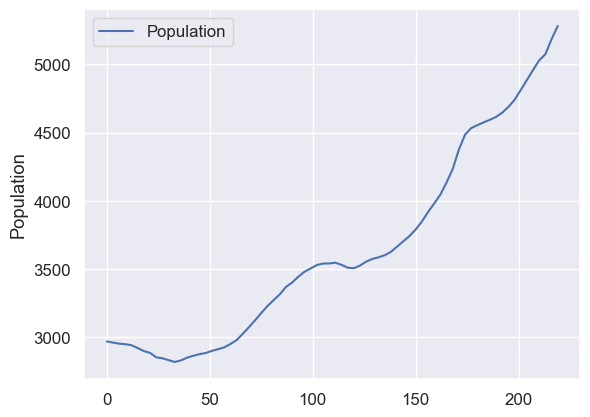

In [1304]:
# plot the dataset
ax = PopulationLRT.plot()
ax.set_ylabel('Population')
plt.show()

In [1305]:
PopulationML.head()

,Year,Population
0,1950,2969.0
3,1951,2960.6
6,1952,2952.9
9,1953,2949.0
12,1954,2941.2


LinearRegression()

Training R^2: 0.8876661833048455
Test R^2: -5.318184390661679


Text(0.5, 0, 'Year')

Text(0, 0.5, 'Population')

Text(0.5, 1.0, 'Linear Regression Population Prediction')

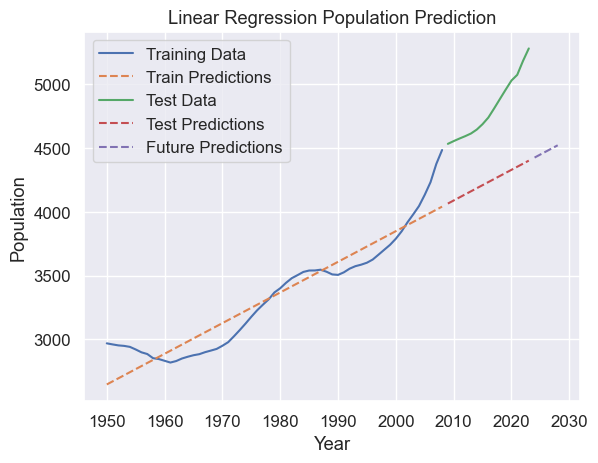

In [1306]:
# Create X and y objects
X = PopulationML[['Year']]
y = PopulationML['Population']

# Create Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=False)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X=X_train, y=y_train)

# Predictions for training and test data
train_forecast = my_lm.predict(X_train)
test_forecast = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_forecast)
test_r2 = r2_score(y_test, test_forecast)

# Display the training and test score
print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

# Predictions for the next 5 years
# Create a DataFrame with future years
futureYears = pd.DataFrame({'Year': range(PopulationML['Year'].max() + 1, PopulationML['Year'].max() + 6)})

# Make predictions for future years
futurePredictions = my_lm.predict(futureYears[['Year']])

# Plot training data and predictions
plt.plot(X_train, y_train, label='Training Data', linestyle='solid')
plt.plot(X_train, train_forecast, label='Train Predictions', linestyle='dashed')

# Plot test data and predictions
plt.plot(X_test, y_test, label='Test Data', linestyle='solid')
plt.plot(X_test, test_forecast, label='Test Predictions', linestyle='dashed')

# Plot future predictions
plt.plot(futureYears, futurePredictions, label='Future Predictions', linestyle='dashed')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Linear Regression Population Prediction')
plt.legend()
plt.show()

# Binomial Distribution

With this graph and analysis, I will make a binomial distribution on the probability that if 2 out of 3 people are interviewed in 2023 it will be a woman.

To see if it can be positive or negative that the person interviewed will be a woman.

In [1307]:
FM2023= PEA_t[(PEA_t["Sex"]=="Male")|(PEA_t["Sex"]=="Female")]
FM2023.head()

,Year,Sex,All ages
1,1950,Male,1510.0
2,1950,Female,1459.0
4,1951,Male,1506.6
5,1951,Female,1454.0
7,1952,Male,1500.9


In [1308]:
FM_2023=FM2023[FM2023["Year"].astype("int64")>=2023]
FM_2023.head()

,Year,Sex,All ages
220,2023,Male,2606.2
221,2023,Female,2675.4


Remembering that the amounts are in thousands is as follows 

In [1309]:
Male=26062000
Female=26754000

In [1310]:
Popu_2023= Male+ Female
Popu_2023

52816000

Percentage of women and men of total population = probability 

In [1311]:
PMale=Male/Popu_2023
PMale

0.493448954862163

In [1312]:
PFemale=Female/Popu_2023
PFemale

0.506551045137837

In [1313]:
PFemale+ PMale

1.0

In [1314]:
X=ss.binom(3,PFemale)
X.mean()
print(X.mean())

1.519653135413511

1.519653135413511


This indicates that I can have 1.52 women interviewed for every 3, which in this case, as it is a qualitative value, would be 2 women for every 3 interviewed. 

Probability that 2 out of every 3 people interviewed are women.
I have to traverse a previous value, in this case instead of 2 it will be one 

In [1315]:
Xpr=X.sf(1)
print(Xpr)

0.5098260054149284


There is a probability that 0.51 are men for every 3 people interviewed, in this case one for every 3. 

In [1316]:
pr1= 1- sum(X.pmf(x)
for x in range (2))
print(pr1)

0.5098260054149284


There is a probability of 0.51 that there are 3 women out of the 3 to be interviewed.

For a better visualization I will make 2 graphs 

Text(0.5, 1.0, 'Binomial_Distribution')

Text(0, 0.5, 'Probability')

Text(0.5, 0, 'Ladys')

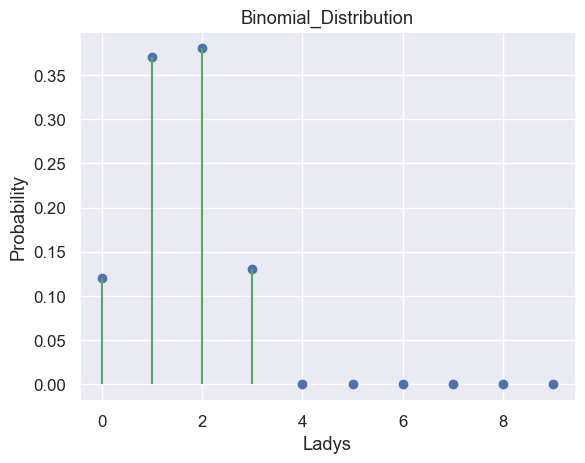

In [1317]:
X=ss.binom(3,PFemale)
x=np.arange(10)
plt.plot(x,X.pmf(x),"bo")
plt.vlines(x,0,X.pmf(x),"g")
plt.title("Binomial_Distribution")
plt.ylabel("Probability")
plt.xlabel("Ladys")
plt.show()

In [1318]:
#Histogram

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Binomial_Distribution')

Text(0, 0.5, 'Probability')

Text(0.5, 0, 'Ladys')

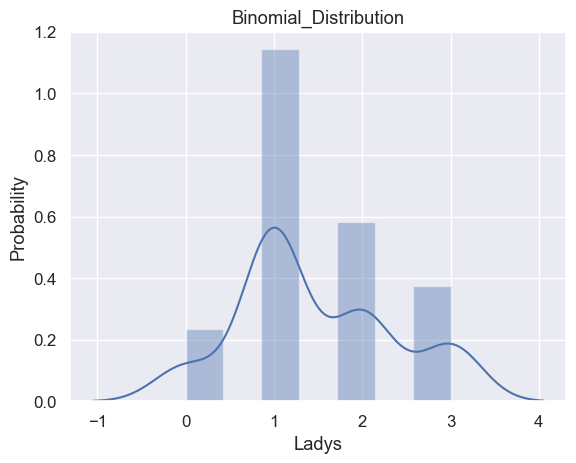

In [1319]:
from numpy import random
sns.distplot(random.binomial(n=3,p=PFemale,size=100),hist=True,kde=True)
plt.title("Binomial_Distribution")
plt.ylabel("Probability")
plt.xlabel("Ladys")
plt.show()

# Analysis by age 

To continue with the data cleaning, I will group by each 10 years, to reduce the number of columns and to be able to better manipulate the information since in several columns the age is repeated. 

In [1320]:
PEA['0-9'] = PEA['0 - 4']+PEA['5 - 9 years']
PEA['10-19'] = PEA['10 - 14 years']+PEA['15 - 19 years']
PEA['20-29'] = PEA['20 - 24 years']+PEA['25 - 29 years']
PEA['30-39'] = PEA['30 - 34 years']+PEA['35 - 39 years']
PEA['40-49'] = PEA['40 - 44 years']+PEA['45 - 49 years']
PEA['50-59'] = PEA['50 - 54 years']+PEA['55 - 59 years']
PEA['60-69'] = PEA['60 - 64 years']+PEA['65 - 69 years']
PEA['70-79'] = PEA['70 - 74 years']+PEA['75 - 79 years']
PEA['80+'] = PEA['80 - 84 years']+PEA['85 years and over']

In [1321]:
PEA.head()

,Year,Sex,Under 1 year,0 - 14 years,1 - 4 years,5 - 9 years,10 - 14 years,15 - 19 years,15 - 24 years,15 years and over,...,0 - 4,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
0,1950,Both sexes,61.1,851.2,249.1,278.9,262.1,244.0,452.6,2117.8,...,310.2,589.1,506.1,409.7,394.6,341.7,288.8,231.2,164.4,43.4
1,1950,Male,31.4,434.6,127.5,142.3,133.4,126.6,234.9,1075.4,...,158.9,301.2,260.0,209.2,200.1,176.0,146.4,116.5,80.9,19.7
2,1950,Female,29.7,416.6,121.6,136.6,128.7,117.4,217.7,1042.4,...,151.3,287.9,246.1,200.5,194.5,165.7,142.4,114.7,83.5,23.7
3,1951,Both sexes,63.6,854.8,249.3,281.0,260.9,241.2,443.4,2105.8,...,312.9,593.9,502.1,400.6,392.5,341.2,291.8,229.6,164.7,44.2
4,1951,Male,32.6,436.4,127.6,143.5,132.7,125.7,231.1,1070.2,...,160.2,303.7,258.4,205.0,198.7,176.4,147.9,115.4,80.7,20.1


In [1322]:
PEA_ages= PEA[['Year','Sex','0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+']]
PEA_ages.head()

,Year,Sex,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
0,1950,Both sexes,589.1,506.1,409.7,394.6,341.7,288.8,231.2,164.4,43.4
1,1950,Male,301.2,260.0,209.2,200.1,176.0,146.4,116.5,80.9,19.7
2,1950,Female,287.9,246.1,200.5,194.5,165.7,142.4,114.7,83.5,23.7
3,1951,Both sexes,593.9,502.1,400.6,392.5,341.2,291.8,229.6,164.7,44.2
4,1951,Male,303.7,258.4,205.0,198.7,176.4,147.9,115.4,80.7,20.1


In [1323]:
PEA_2017=PEA_ages [PEA_ages["Year"].astype("int64")>=2003]
PEA_2017.head()

,Year,Sex,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
159,2003,Both sexes,553.0,586.4,651.4,612.5,532.9,441.7,295.3,203.3,103.6
160,2003,Male,283.2,300.3,325.6,305.6,265.8,223.4,146.7,90.5,36.0
161,2003,Female,269.8,286.1,325.8,306.9,267.1,218.2,148.6,112.9,67.6
162,2004,Both sexes,565.6,576.6,661.5,628.6,545.2,452.0,303.5,205.7,106.5
163,2004,Male,289.9,295.5,331.1,314.2,272.2,228.6,151.1,92.4,37.1


In [1324]:
PEA_ML= PEA_2017[(PEA_2017["Sex"]=="Male")|(PEA_2017["Sex"]=="Female")]
PEA_ML.head()

,Year,Sex,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
160,2003,Male,283.2,300.3,325.6,305.6,265.8,223.4,146.7,90.5,36.0
161,2003,Female,269.8,286.1,325.8,306.9,267.1,218.2,148.6,112.9,67.6
163,2004,Male,289.9,295.5,331.1,314.2,272.2,228.6,151.1,92.4,37.1
164,2004,Female,275.8,281.1,330.4,314.5,273.1,223.4,152.4,113.3,69.4
166,2005,Male,296.0,291.8,344.1,326.5,280.0,234.9,155.8,94.5,38.3


Once my information is grouped I would like to see 3 graphs: kids 0-9 (youngest population; adults by year (18 years, group of 10-19) and oldest population (80 +)

In [1325]:
#kids 0-9 (youngest population)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '2003'),
  Text(1, 0, '2004'),
  Text(2, 0, '2005'),
  Text(3, 0, '2006'),
  Text(4, 0, '2007'),
  Text(5, 0, '2008'),
  Text(6, 0, '2009'),
  Text(7, 0, '2010'),
  Text(8, 0, '2011'),
  Text(9, 0, '2012'),
  Text(10, 0, '2013'),
  Text(11, 0, '2014'),
  Text(12, 0, '2015'),
  Text(13, 0, '2016'),
  Text(14, 0, '2017'),
  Text(15, 0, '2018'),
  Text(16, 0, '2019'),
  Text(17, 0, '2020'),
  Text(18, 0, '2021'),
  Text(19, 0, '2022'),
  Text(20, 0, '2023')])

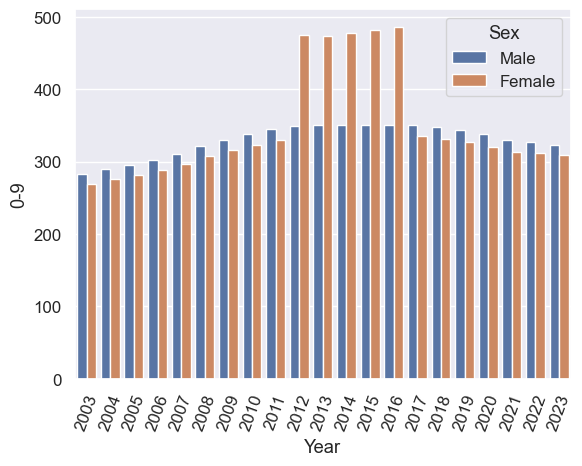

In [1326]:
ax = sns.barplot(x="Year", y="0-9", hue='Sex', data=PEA_ML)
plt.xticks(rotation=70)

In [1327]:
#Adults by year (18 years, group of 10-19)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '2003'),
  Text(1, 0, '2004'),
  Text(2, 0, '2005'),
  Text(3, 0, '2006'),
  Text(4, 0, '2007'),
  Text(5, 0, '2008'),
  Text(6, 0, '2009'),
  Text(7, 0, '2010'),
  Text(8, 0, '2011'),
  Text(9, 0, '2012'),
  Text(10, 0, '2013'),
  Text(11, 0, '2014'),
  Text(12, 0, '2015'),
  Text(13, 0, '2016'),
  Text(14, 0, '2017'),
  Text(15, 0, '2018'),
  Text(16, 0, '2019'),
  Text(17, 0, '2020'),
  Text(18, 0, '2021'),
  Text(19, 0, '2022'),
  Text(20, 0, '2023')])

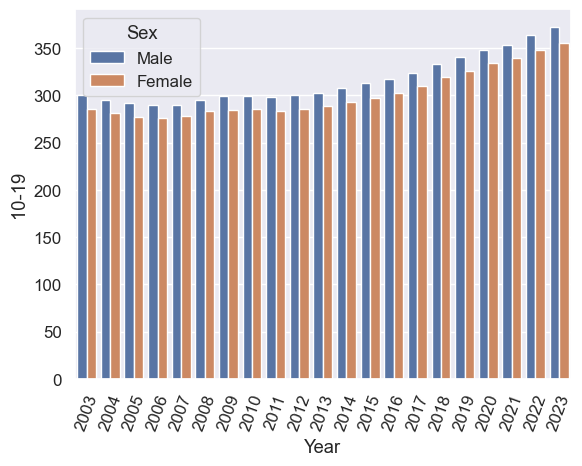

In [1328]:
ax = sns.barplot(x="Year", y="10-19", hue='Sex', data=PEA_ML)
plt.xticks(rotation=70)

In [1329]:
#Oldest population (80 +)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '2003'),
  Text(1, 0, '2004'),
  Text(2, 0, '2005'),
  Text(3, 0, '2006'),
  Text(4, 0, '2007'),
  Text(5, 0, '2008'),
  Text(6, 0, '2009'),
  Text(7, 0, '2010'),
  Text(8, 0, '2011'),
  Text(9, 0, '2012'),
  Text(10, 0, '2013'),
  Text(11, 0, '2014'),
  Text(12, 0, '2015'),
  Text(13, 0, '2016'),
  Text(14, 0, '2017'),
  Text(15, 0, '2018'),
  Text(16, 0, '2019'),
  Text(17, 0, '2020'),
  Text(18, 0, '2021'),
  Text(19, 0, '2022'),
  Text(20, 0, '2023')])

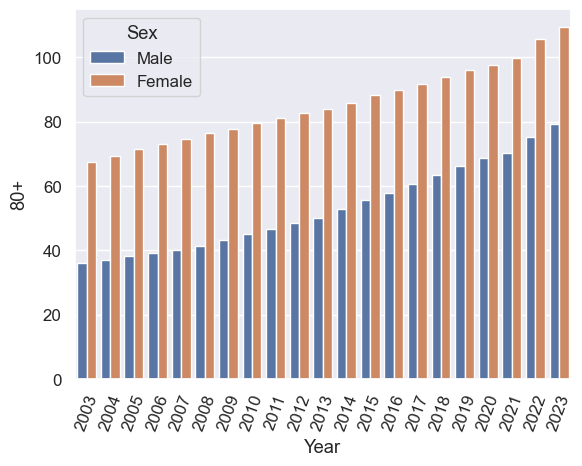

In [1330]:
ax = sns.barplot(x="Year", y="80+", hue='Sex', data=PEA_ML)
plt.xticks(rotation=70)

# Age group of the current population, 2023 

Finally with a standing graph I would like to see the current population of 2023 by age

In [1331]:
PEA_2023= PEA_ages[PEA_ages["Sex"]=="Both sexes"]

In [1332]:
PEA2023=PEA_2023[PEA_2023["Year"].astype("int64")==2023]

In [1333]:
PEA_2023= PEA2023.drop(columns=['Year','Sex',])
PEA_2023.head()

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
219,632.4,728.7,626.3,721.5,810.4,670.8,530.0,372.6,188.9


In [1334]:
PEA_2023=PEA_2023.melt(var_name="Age",value_name="Population")
PEA_2023

,Age,Population
0,0-9,632.4
1,10-19,728.7
2,20-29,626.3
3,30-39,721.5
4,40-49,810.4
5,50-59,670.8
6,60-69,530.0
7,70-79,372.6
8,80+,188.9


In [1335]:
#Matplotlib

([<matplotlib.patches.Wedge at 0x1e2cc793bd0>,
 [Text(-0.40409005618923566, 1.0230890608783678, '0-9'),
  Text(-1.0194675755788283, 0.4131414556098507, '10-19'),
  Text(-1.0039699371284998, -0.44949345417057684, '20-29'),
  Text(-0.3752723877636399, -1.0340070768530438, '30-39'),
  Text(0.5871493986799886, -0.9301911543493241, '40-49'),
  Text(1.0911832374739403, -0.13899331730659034, '50-59'),
  Text(0.9155243104146387, 0.6097665430636552, '60-69'),
  Text(0.4748452611521877, 0.9922308088148195, '70-79'),
  Text(0.12333736495215326, 1.0930635363082328, '80+')],
 [Text(-0.22041275792140125, 0.5580485786609278, '12.0%'),
  Text(-0.5560732230429972, 0.22534988487810037, '13.8%'),
  Text(-0.5476199657064543, -0.2451782477294055, '11.9%'),
  Text(-0.20469402968925812, -0.5640038601016601, '13.7%'),
  Text(0.32026330837090283, -0.5073769932814495, '15.3%'),
  Text(0.5951908568039674, -0.07581453671268563, '12.7%'),
  Text(0.49937689658980283, 0.33259993258017556, '10.0%'),
  Text(0.25900650

Text(0.5, 1.0, 'Population 2023')

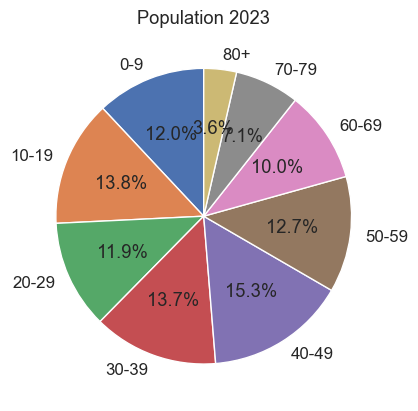

In [1336]:
plt.pie(PEA_2023['Population'], labels=PEA_2023['Age'], autopct='%1.1f%%', startangle=90)

plt.title('Population 2023')

In [1337]:
#Since I have little data, I will create the lists so that I can plot it as if I did not have the dataframe.

([<matplotlib.patches.Wedge at 0x1e2cc7ff510>,
 [Text(0.9373765373044073, 0.5756085712627979, '0-9'),
  Text(0.2507304238751376, 1.1735136362835303, '10-19'),
  Text(-0.6170021886101682, 0.9106636586853911, '20-29'),
  Text(-1.181960238783536, 0.2072920498590499, '30-39'),
  Text(-0.8141020374875757, -0.7397552788311674, '40-49'),
  Text(0.05738212820469358, -1.1986272528866933, '50-59'),
  Text(0.7594819472498151, -0.7957305899622241, '60-69'),
  Text(1.1559410264413783, -0.32218060678702093, '70-79'),
  Text(1.0978747537534714, 0.06834489791311736, '80+')],
 [Text(0.5112962930751311, 0.31396831159788974, '12.0%'),
  Text(0.14625941392716357, 0.6845496211653928, '13.8%'),
  Text(-0.33654664833281894, 0.4967256320102133, '11.9%'),
  Text(-0.6894768059570625, 0.1209203624177791, '13.7%'),
  Text(-0.44405565681140485, -0.40350287936245494, '15.3%'),
  Text(0.033472908119404586, -0.6991992308505709, '12.7%'),
  Text(0.4142628803180809, -0.4340348672521222, '10.0%'),
  Text(0.6742989320908

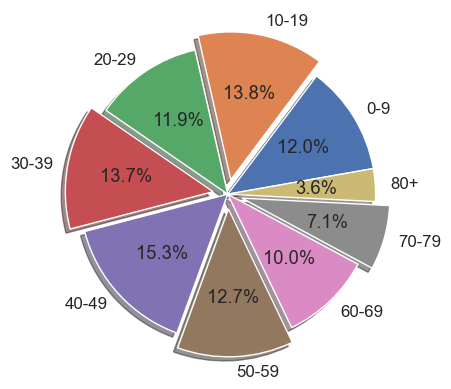

In [1338]:
ages=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
Population=[632.4, 728.7,626.3, 721.5,810.4, 670.8, 530.0,372.6,188.9]
explode=(0,0.1,0,0.1,0,0.1,0,0.1,0)
plt.pie(Population,labels=ages, explode=explode, autopct="%1.1f%%", shadow=True, startangle=10)
plt.show()

# #  Annual Population Change since 1950

Review of database

Type of files

Renaming of headers 

In [1339]:
AP.head()

,STATISTIC,Year,UNIT,Annual births,Annual deaths,Natural increase,Immigrants,Emigrants,Net migration,Population change,Population
0,Annual Population Change,1951,Thousand,NaN,NaN,26.6,NaN,NaN,-35.0,-8.4,2960.6
1,Annual Population Change,1952,Thousand,NaN,NaN,27.3,NaN,NaN,-35.0,-7.7,2952.9
2,Annual Population Change,1953,Thousand,NaN,NaN,29.1,NaN,NaN,-33.0,-3.9,2949.0
3,Annual Population Change,1954,Thousand,NaN,NaN,28.2,NaN,NaN,-36.0,-7.8,2941.2
4,Annual Population Change,1955,Thousand,NaN,NaN,24.7,NaN,NaN,-45.0,-20.3,2920.9


In this database I have relevant information that I would like to graph as births and deaths by year, first I will clean my information to be able to work with it. 

In [1340]:
AP= AP.drop(['STATISTIC','UNIT'],axis= 1)

In the case of this analysis I do not want to work with totals, but with variables, so I will eliminate the columns of totals.

In [1341]:
AP= AP.drop(['Natural increase','Net migration','Population change','Population'],axis= 1)
AP.head()

,Year,Annual births,Annual deaths,Immigrants,Emigrants
0,1951,NaN,NaN,NaN,NaN
1,1952,NaN,NaN,NaN,NaN
2,1953,NaN,NaN,NaN,NaN
3,1954,NaN,NaN,NaN,NaN
4,1955,NaN,NaN,NaN,NaN


In [1342]:
AP=AP.rename(columns={'Annual births':'Annual_births', 'Annual deaths':'Annual_deaths'})

In [1343]:
AP.shape

(73, 5)

# Missing information 

Due to the previous data frame coding I have missing data so I will continue with the validations to see how much data is missing and which columns.

In [1344]:
AP.isnull()

,Year,Annual_births,Annual_deaths,Immigrants,Emigrants
0,False,True,True,True,True
1,False,True,True,True,True
2,False,True,True,True,True
3,False,True,True,True,True
4,False,True,True,True,True
...,...,...,...,...,...
68,False,False,False,False,False
69,False,False,False,False,False
70,False,False,False,False,False
71,False,False,False,False,False


In [1345]:
AP.isnull().sum()

Year              0
Annual_births    36
Annual_deaths    36
Immigrants       36
Emigrants        36
dtype: int64

In [1346]:
AP.notnull()

,Year,Annual_births,Annual_deaths,Immigrants,Emigrants
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
68,True,True,True,True,True
69,True,True,True,True,True
70,True,True,True,True,True
71,True,True,True,True,True


As was done in the last analysis, I will continue to fill in the missing data with Replacing NaNs using Median/Mean of the column, as it follows a specific pattern in relation to the other years. 

In [1347]:
AP['Annual_births'].fillna(int(AP['Annual_births'].mean()), inplace=True) 

print(AP['Annual_births'].head()) 

0    60.0
1    60.0
2    60.0
3    60.0
4    60.0
Name: Annual_births, dtype: float64


In [1348]:
AP.isnull().sum()

Year              0
Annual_births     0
Annual_deaths    36
Immigrants       36
Emigrants        36
dtype: int64

In [1349]:
AP['Immigrants'].fillna(int(AP['Immigrants'].mean()), inplace=True) 

In [1350]:
AP['Emigrants'].fillna(int(AP['Emigrants'].mean()), inplace=True) 

In [1351]:
AP['Annual_deaths'].fillna(int(AP['Annual_deaths'].mean()), inplace=True) 

In [1352]:
AP.isnull().sum()

Year             0
Annual_births    0
Annual_deaths    0
Immigrants       0
Emigrants        0
dtype: int64

Once I have completed my information, I will continue with the graphing of these two variables about the last 50 years

In [1353]:
AP.dtypes

Year               int64
Annual_births    float64
Annual_deaths    float64
Immigrants       float64
Emigrants        float64
dtype: object

In [1354]:
AP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           73 non-null     int64  
 1   Annual_births  73 non-null     float64
 2   Annual_deaths  73 non-null     float64
 3   Immigrants     73 non-null     float64
 4   Emigrants      73 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 3.0 KB


In [1355]:
AP=AP [AP["Year"].astype("int64")>=1973]
AP.head()

,Year,Annual_births,Annual_deaths,Immigrants,Emigrants
22,1973,60.0,30.0,65.0,48.0
23,1974,60.0,30.0,65.0,48.0
24,1975,60.0,30.0,65.0,48.0
25,1976,60.0,30.0,65.0,48.0
26,1977,60.0,30.0,65.0,48.0


In [1356]:
AP.count()

Year             51
Annual_births    51
Annual_deaths    51
Immigrants       51
Emigrants        51
dtype: int64

# #Poisson distribution


For this distribution I would like to know if out of 20 women who are in labor in a hospital at the same time, what is the probability that 3 women will give birth that same time (second)?

In [1357]:
NI_2023=NI[NI["Year"].astype("int64")==2022]
NI_2023.head()

,Year,Annual_births
71,2022,59.7


Remembering that the numbers are in thousands, there were 597000 births in the year, I will divide until I get the value per second.

Births per second

86400 seconds in a day

In [1358]:
S_Birth= (597000/365)/86400
S_Birth 

0.018930745814307457

Mean number of births per year

In [1359]:
NI['Annual_births'].mean()

60.0764705882353

In [1360]:
#Seaborn

<Axes: xlabel='Annual_births'>

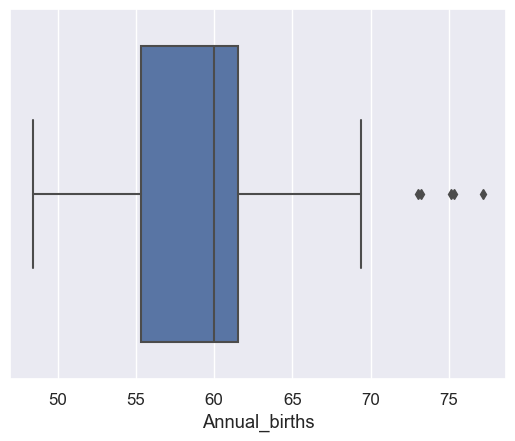

In [1361]:
sns.boxplot(x=NI["Annual_births"])

Probability of 20 women in labor 

In [1362]:
A=ss.poisson(S_Birth)
b=A.cdf(20)
print(b)

1.0


Probability that 3 babies will be born in that second 

In [1363]:
Y=ss.poisson(3)
c=Y.sf(10)
print(c)

0.00029233695064733665


Text(0.5, 1.0, 'Poisson distribution')

Text(0, 0.5, 'Probability')

Text(0.5, 0, 'Births')

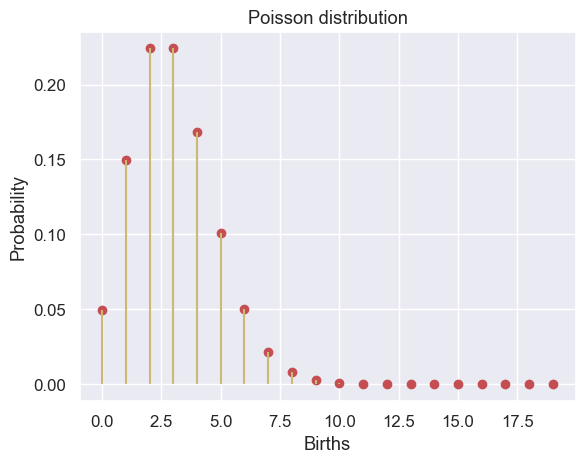

In [1364]:
y=np.arange(20)
plt.plot(y,Y.pmf(y),"ro")
plt.vlines(y,0,Y.pmf(y),"y")
plt.title("Poisson distribution")
plt.ylabel("Probability")
plt.xlabel("Births")
plt.show()

<Axes: >

Text(0.5, 1.0, 'Poisson distribution')

Text(0, 0.5, 'Probability')

Text(0.5, 0, 'Births')

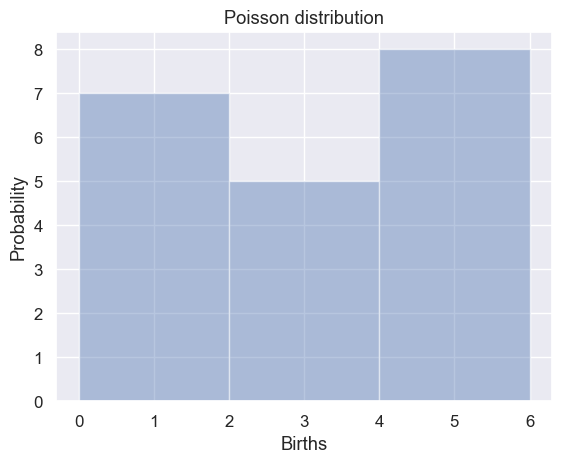

In [1365]:
sns.distplot(random.poisson(lam=3, size=20),kde=False)
plt.title("Poisson distribution")
plt.ylabel("Probability")
plt.xlabel("Births")
plt.show()

# Annual_births&Annual_deaths

In [1366]:
NI= AP[['Year','Annual_births','Annual_deaths']]
NI.head()

,Year,Annual_births,Annual_deaths
22,1973,60.0,30.0
23,1974,60.0,30.0
24,1975,60.0,30.0
25,1976,60.0,30.0
26,1977,60.0,30.0


In [1367]:
#Annual deaths

# Normal distribution 

With respect to this information, I want to see what the probability is that in a year there are 33 thousand people dead and 31 thousand dead. 

In [1368]:
A_deaths= AP[['Year','Annual_deaths']]
A_deaths.head()

,Year,Annual_deaths
22,1973,30.0
23,1974,30.0
24,1975,30.0
25,1976,30.0
26,1977,30.0


For which I first consult the mean with a boxplot of the 51 previous years I am analyzing.

<Axes: xlabel='Annual_deaths'>

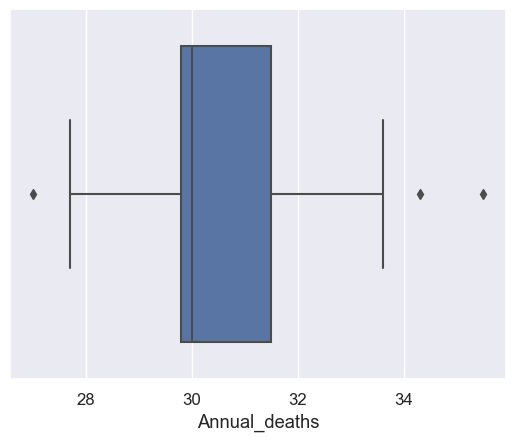

In [1369]:
sns.boxplot(x=A_deaths["Annual_deaths"])

I can see that the mean is between 30-31

Confirmed by consulting the mean

In [1370]:
μ=A_deaths['Annual_deaths'].mean()
μ 

30.47254901960784

Standard deviation  to see how far it is from the mean

In [1371]:
σ=A_deaths['Annual_deaths'].std()
σ

1.7014203985344185

In [1372]:
#Deaths per year that I want to analyze 
D_1=31
D_2=33

In [1373]:
z1=(D_1-μ)/σ
z2=(D_2-μ)/σ
print(z1,z2)

0.3100062634998968 1.4854946975887169


the probability is 31%

In [1374]:
from scipy.stats import norm

(-8.0, 8.0)

Text(0.5, 1.0, 'Normal distribution')

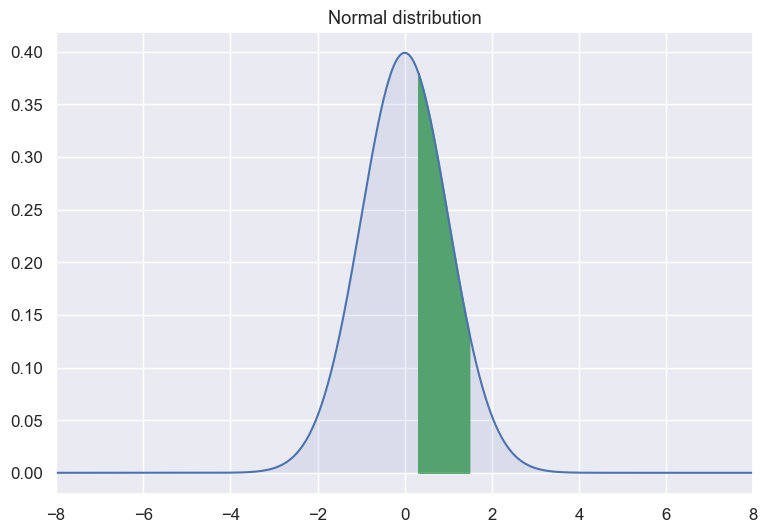

In [1375]:
x=np.arange(z1,z2,0.01)
x2=np.arange(-10,10,0.01)
y= norm.pdf(x,0,1)
y2= norm.pdf(x2,0,1)
fig,ax=plt.subplots(figsize=(9,6))
ax.plot(x2,y2)
ax.fill_between(x,y,0,color="g")
ax.fill_between(x2,y2,0,alpha=0.1)
ax.set_xlim([-8,8])
ax.set_title("Normal distribution")
plt.show()

# Comparison of four variables over the years

Now, the comparison between these two variables over the years, I chose plot and bars because you can see the comparison of the amount, in this case total number of people. 

In [1376]:
#Matplotlib

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of people')

Text(0.5, 1.0, 'Annual_births&Annual_deaths')

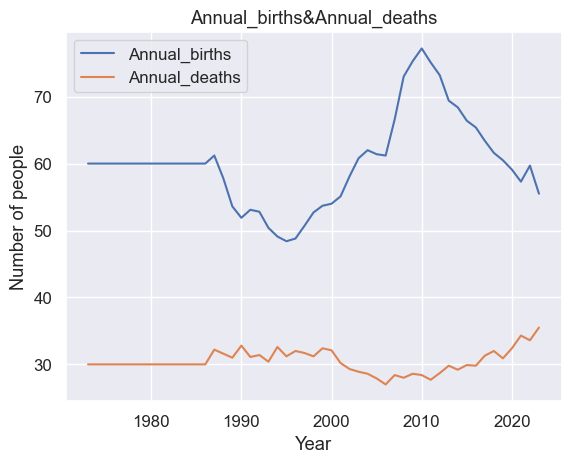

In [1377]:
plt.plot(AP['Year'], AP['Annual_births'], label='Annual_births')
plt.plot(AP['Year'], AP['Annual_deaths'], label='Annual_deaths')

plt.xlabel('Year')
plt.ylabel('Number of people')
plt.title('Annual_births&Annual_deaths')
plt.legend()
plt.show()

<BarContainer object of 51 artists>

<BarContainer object of 51 artists>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of people')

Text(0.5, 1.0, 'Immigrants&Emigrants')

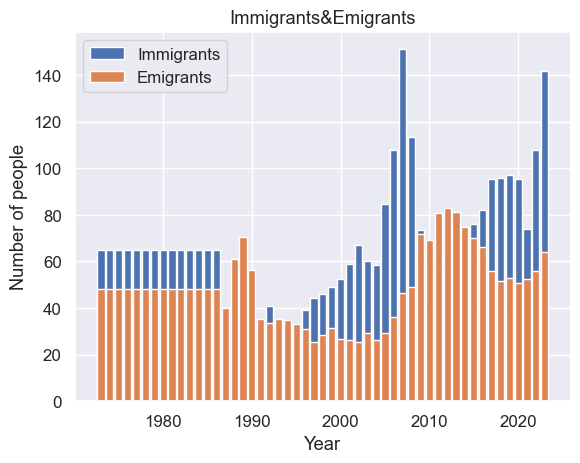

In [1378]:
plt.bar(AP['Year'], AP['Immigrants'], label='Immigrants')
plt.bar(AP['Year'], AP['Emigrants'], label='Emigrants')



plt.xlabel('Year')
plt.ylabel('Number of people')
plt.title('Immigrants&Emigrants')
plt.legend()
plt.show()

In [1379]:
#Matplotlib

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of people')

Text(0.5, 1.0, 'Comparison of four variables')

(array([1970., 1980., 1990., 2000., 2010., 2020., 2030.]),
 [Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030')])

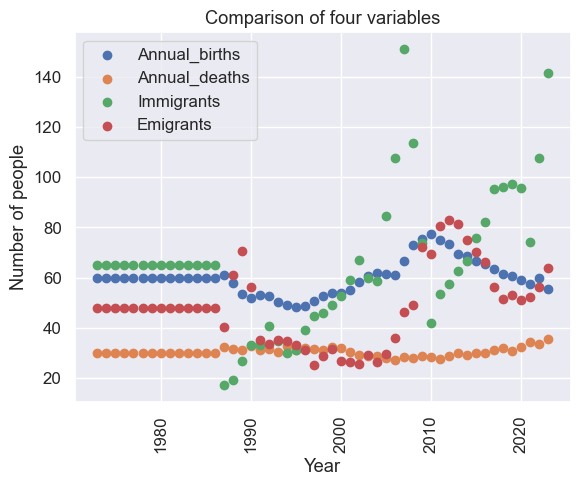

In [1380]:
plt.scatter(NI['Year'], NI['Annual_births'], label='Annual_births')
plt.scatter(NI['Year'], NI['Annual_deaths'], label='Annual_deaths')
plt.scatter(AP['Year'], AP['Immigrants'], label='Immigrants')
plt.scatter(AP['Year'], AP['Emigrants'], label='Emigrants')

plt.xlabel('Year')
plt.ylabel('Number of people')
plt.title('Comparison of four variables')

plt.xticks(rotation=90)
plt.legend()
plt.show()

# Simple regression mode

For this simple regression model I will use one of my early data frames the population group under 1 in the last 50 years to compare it and predict if it will grow with the number of births.

In [1381]:
PEA_S= PEA[PEA["Sex"]=="Both sexes"]

In [1382]:
PEA_SR=PEA_S[['Year','Under 1 year']]

In [1383]:
PEA_SR= PEA_SR[PEA_SR['Year']>=1980]
PEA_SR.head()

,Year,Under 1 year
90,1980,72.5
93,1981,73.4
96,1982,71.0
99,1983,70.0
102,1984,66.1


In [1384]:
NI= AP[['Year','Annual_births']]

In [1385]:
NI_SR= NI[NI['Year']>=1980]
NI_SR.head()

,Year,Annual_births
29,1980,60.0
30,1981,60.0
31,1982,60.0
32,1983,60.0
33,1984,60.0


In [1386]:
class LinearRegressionGD(object):
    
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In this case my variable y is dependent because without births it could not grow, while X, number of births, is the independent variable. 

In [1387]:
X = NI_SR[['Annual_births']].values
y = PEA_SR[['Under 1 year']].values

In [1388]:
X.shape, y.shape

((44, 1), (44, 1))

In [1389]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [1390]:
y_std = np.reshape(y_std, 44)

# Display the number of rows and columns
X_std.shape, y_std.shape

((44, 1), (44,))

In [1391]:
# Initialise an object (lr) using the created function LinearRegressionGD()
lr = LinearRegressionGD()

# Train the model by calling fit() mentiof
lr.fit(X_std, y_std)

Text(0, 0.5, 'Under 1 year')

Text(0.5, 0, 'Annual_births')

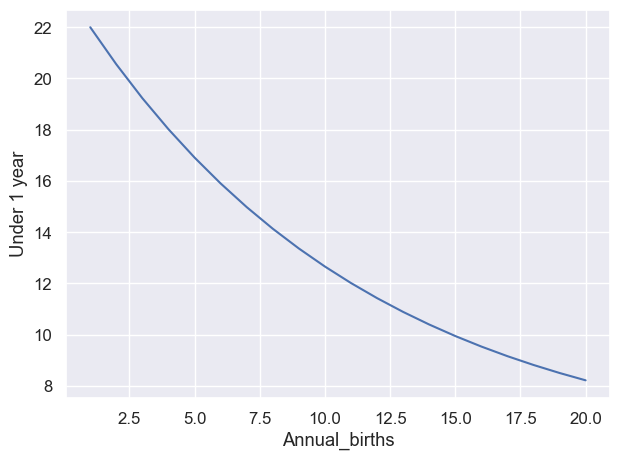

In [1392]:
# Draw a plot using linear regression iterations and cost
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('Under 1 year')           
plt.xlabel('Annual_births')         
plt.tight_layout()

plt.show()


In [1393]:
# Method or Function for Linear Regression plot
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red', linewidth = 2)    
    return

Text(0, 0.5, 'Under 1 year')

Text(0.5, 0, 'Annual_births')

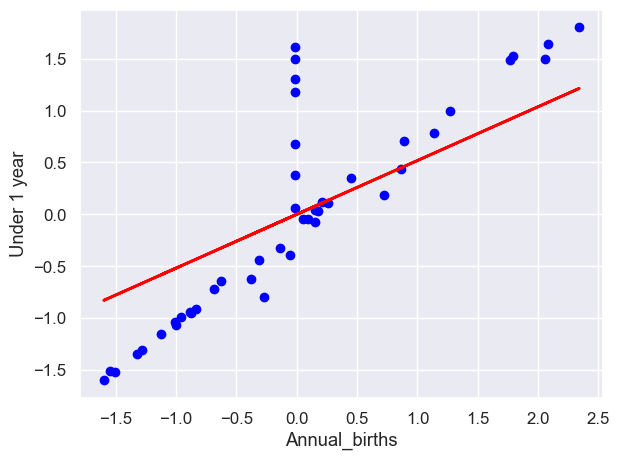

In [1394]:
# Call the method lin_regplot()
lin_regplot(X_std, y_std, lr)
plt.ylabel('Under 1 year')           
plt.xlabel('Annual_births') 
plt.tight_layout()
plt.show()

# Fitting a robust regression model using RANSAC

RANSACRegressor(estimator=LinearRegression(), max_trials=400, min_samples=44,
                random_state=0, residual_threshold=5.0)

Text(0, 0.5, 'Under 1 year')

Text(0.5, 0, 'Annual_births')

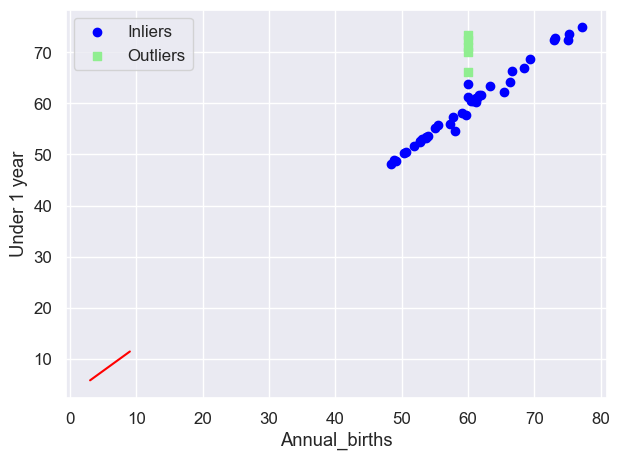

In [1395]:
# import RANSACRegressor library
from sklearn.linear_model import RANSACRegressor

# Initialise an object by calling an object RANSACRegressor()
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials = 400, 
                         min_samples = 44,                          
                         residual_threshold = 5.0, 
                         random_state = 0)
ransac.fit(X, y)

# Store the values for inlier and outlier masks
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c = 'blue', marker = 'o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c = 'lightgreen', marker = 's', label = 'Outliers')
plt.plot(line_X, line_y_ransac, color = 'red')   
plt.ylabel('Under 1 year')           
plt.xlabel('Annual_births') 
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/ransac_fit.png', dpi=300)
plt.show()

In [1396]:
# Display the coefficients and intercepts
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 0.940
Intercept: 2.976


# Supervised learning model for analysis of population growth variables 

In [1397]:
Population_Forecast=pd.merge(PopulationSE,AP)

In [1398]:
Population_Forecast.head()

,Year,Sex,Population,Annual_births,Annual_deaths,Immigrants,Emigrants
0,1973,Both sexes,3073.0,60.0,30.0,65.0,48.0
1,1974,Both sexes,3123.9,60.0,30.0,65.0,48.0
2,1975,Both sexes,3177.2,60.0,30.0,65.0,48.0
3,1976,Both sexes,3227.8,60.0,30.0,65.0,48.0
4,1977,Both sexes,3271.9,60.0,30.0,65.0,48.0


# Pair plot

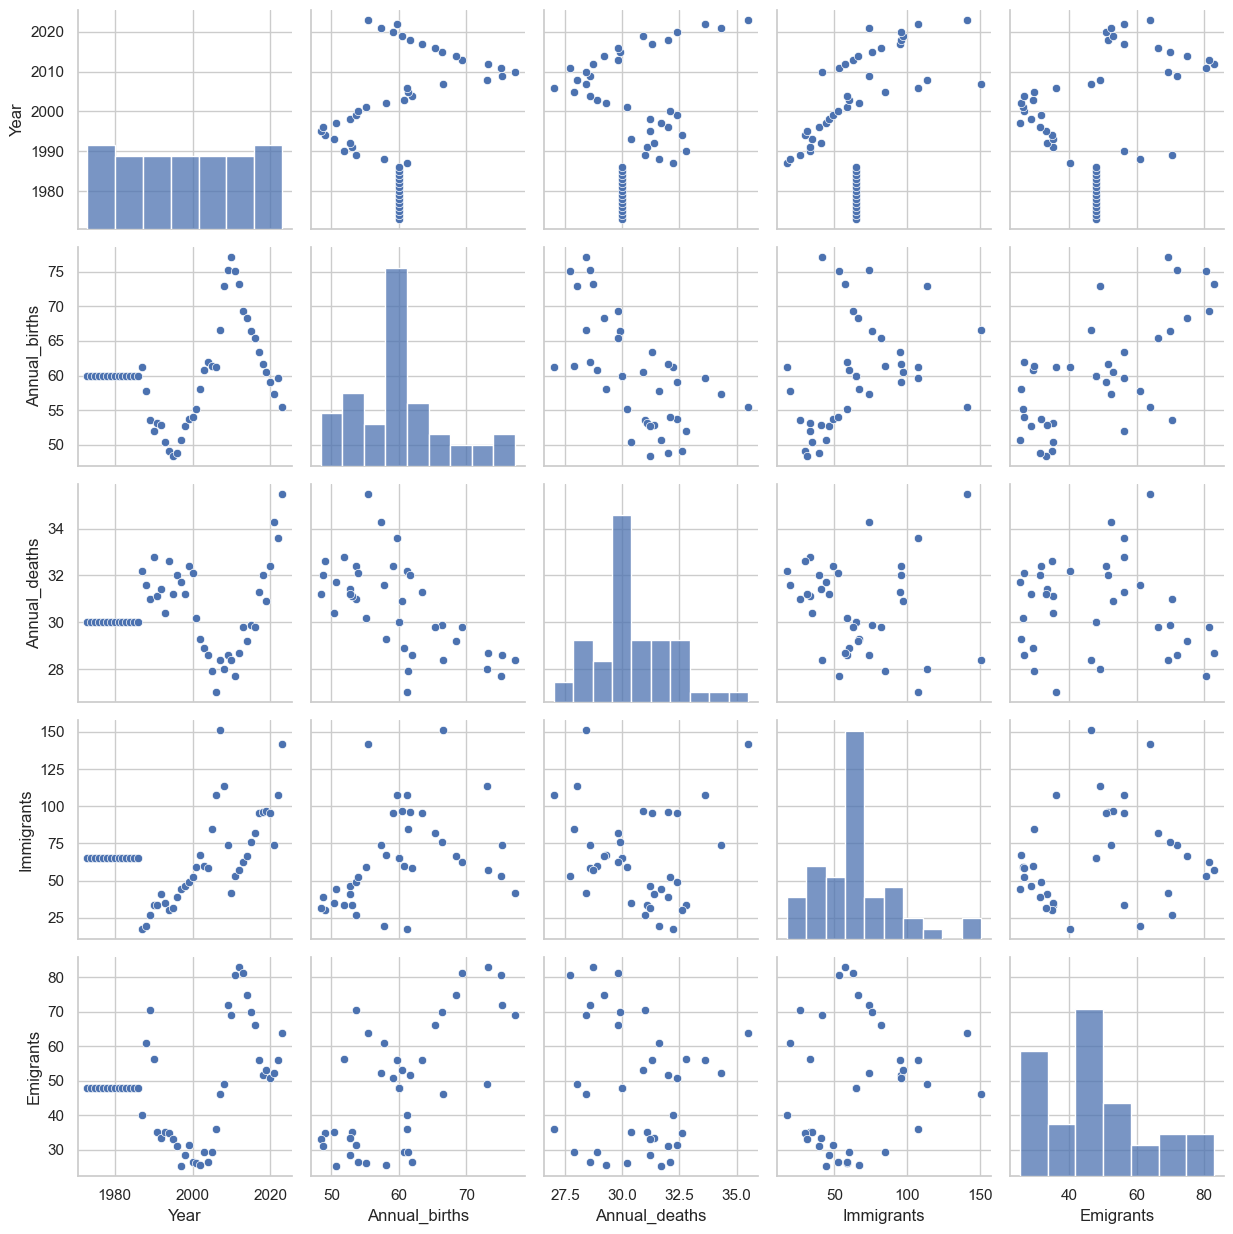

In [1399]:
#I used pair plot to see how the variables are related to each other.
sns.set(style='whitegrid', context='notebook')
cols_1 = ['Year','Annual_births','Annual_deaths','Immigrants','Emigrants']
sns.pairplot(Population_Forecast[cols_1], height = 2.5)
plt.tight_layout()
plt.show()

# Heatmap

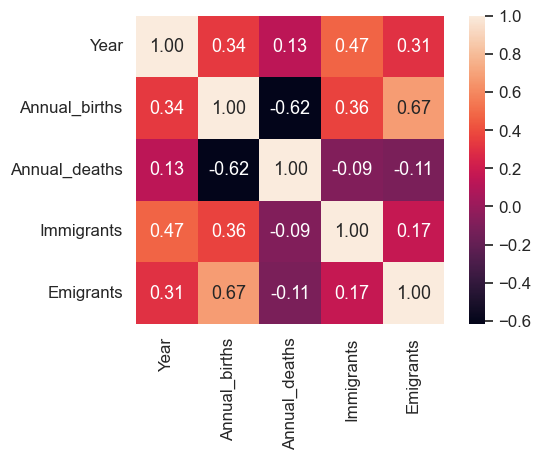

In [1400]:
#I used heatmap to be able to visualize better patterns and trends, as these 4 variables are triggers for change in the population year by year.
Change= np.corrcoef(AP[cols_1].values.T)

sns.set(font_scale = 1.1)

hm = sns.heatmap(Change, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 13},
            yticklabels=cols_1,
            xticklabels=cols_1)

plt.tight_layout()
plt.show()

In [1401]:
Population_Forecast.isnull().sum()

Year             0
Sex              0
Population       0
Annual_births    0
Annual_deaths    0
Immigrants       0
Emigrants        0
dtype: int64

In [1402]:
Population_Forecast.isnull().values.any()

False

In [1403]:
Population_Forecast.nunique(axis = 0)

Year             51
Sex               1
Population       51
Annual_births    37
Annual_deaths    32
Immigrants       36
Emigrants        37
dtype: int64

# Correlation between Features

In [1404]:
correlation = Population_Forecast.corr()
print(correlation)

                   Year  Population  Annual_births  Annual_deaths  Immigrants  \
Year           1.000000    0.965237       0.335068       0.129203    0.473783   
Population     0.965237    1.000000       0.459397       0.119352    0.593928   
Annual_births  0.335068    0.459397       1.000000      -0.616100    0.362551   
Annual_deaths  0.129203    0.119352      -0.616100       1.000000   -0.091577   
Immigrants     0.473783    0.593928       0.362551      -0.091577    1.000000   
Emigrants      0.305502    0.452821       0.672362      -0.112171    0.170096   

               Emigrants  
Year            0.305502  
Population      0.452821  
Annual_births   0.672362  
Annual_deaths  -0.112171  
Immigrants      0.170096  
Emigrants       1.000000  


<Axes: >

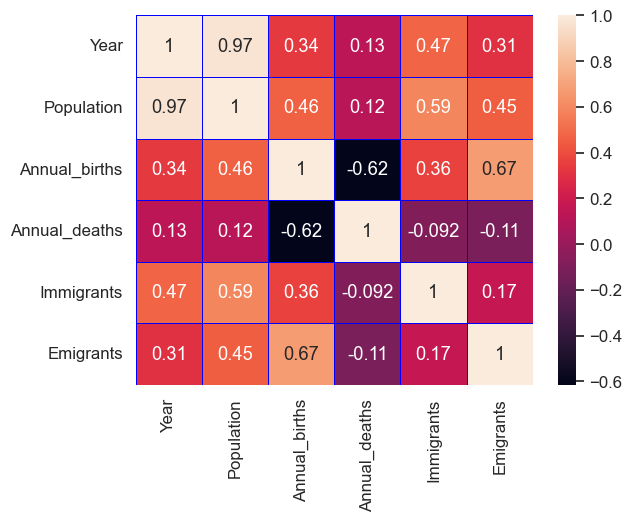

In [1405]:
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [1406]:
y = Population_Forecast['Population']
X = Population_Forecast_scale.drop(['Population'],axis=1)

In [1407]:
X_train = Population_Forecast[['Annual_births', 'Population','Annual_deaths','Immigrants','Emigrants']]  # Variables predictoras
Y_train = Population_Forecast['Population']  # Variable a predecir

In [1408]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [1409]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(40, 5)
(11, 5)
(40,)
(11,)


# Applying ML Models
## Linear regression

In [1410]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [1411]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

In [1412]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.990216805691564
-----Test set statistics-----
R-squared of the model in test set is: 0.9806454880706832
Root mean squared error of the prediction is: 75.49863760452571
Mean absolute percentage error of the prediction is: 1.4048631052580034


# Decision Tree Regressor

In [1413]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [1414]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [1415]:
y_pred_DT = DTregressor.predict(X_test)

In [1416]:
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_DT) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9733978683422139
Root mean squared error of the prediction is: 88.51282906500558
Mean absolute percentage error of the prediction is: 1.7484205718581198


# Random Forest

In [1417]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [1418]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [1419]:
y_pred_random = regressor.predict(X_test)

In [1420]:

print("R-squared of the model in training set is: {}".format(regressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(regressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_random)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_random) / Y_test)) * 100))

R-squared of the model in training set is: 0.9974800784252225
-----Test set statistics-----
R-squared of the model in test set is: 0.9683455839398734
Root mean squared error of the prediction is: 96.55286296117798
Mean absolute percentage error of the prediction is: 1.6977294108933048


# Unsupervised learning model

# Clustering

In [1421]:
x = AP.iloc[:, [1, 2]].values
AP.head()

,Year,Annual_births,Annual_deaths,Immigrants,Emigrants
22,1973,60.0,30.0,65.0,48.0
23,1974,60.0,30.0,65.0,48.0
24,1975,60.0,30.0,65.0,48.0
25,1976,60.0,30.0,65.0,48.0
26,1977,60.0,30.0,65.0,48.0


In [1422]:
from sklearn.cluster import KMeans

In [1423]:
# Applying KMeans to the dataset/ Creating the kmeans classifier
kmeans = KMeans(n_clusters = 4, max_iter = 300, n_init = 10, random_state = 0)

# n_initint, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(x)

print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 0 3 3
 3 3 3 0 0 0 0 1 1 1 1 1 1 2]


Text(0.5, 0, 'Year')

Text(0, 0.5, 'Population')

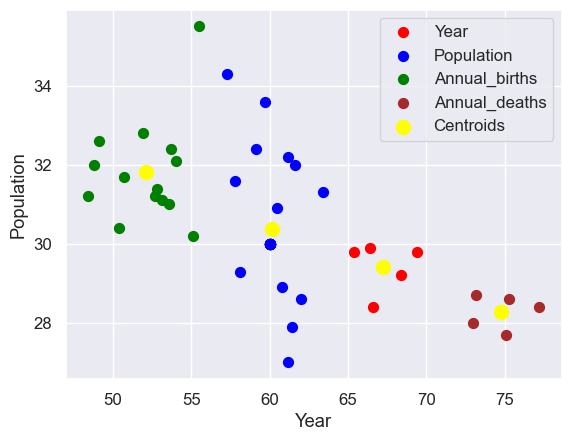

In [1424]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Year')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Population')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Annual_births')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = 'brown', label = 'Annual_deaths')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('Year')
plt.ylabel('Population')

plt.legend() 

KMeans(n_clusters=1, n_init=10, random_state=0)

KMeans(n_clusters=2, n_init=10, random_state=0)

KMeans(n_clusters=3, n_init=10, random_state=0)

KMeans(n_clusters=4, n_init=10, random_state=0)

KMeans(n_clusters=5, n_init=10, random_state=0)

KMeans(n_clusters=6, n_init=10, random_state=0)

KMeans(n_clusters=7, n_init=10, random_state=0)

KMeans(n_init=10, random_state=0)

KMeans(n_clusters=9, n_init=10, random_state=0)

KMeans(n_clusters=10, n_init=10, random_state=0)

Text(0.5, 1.0, 'The elbow method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

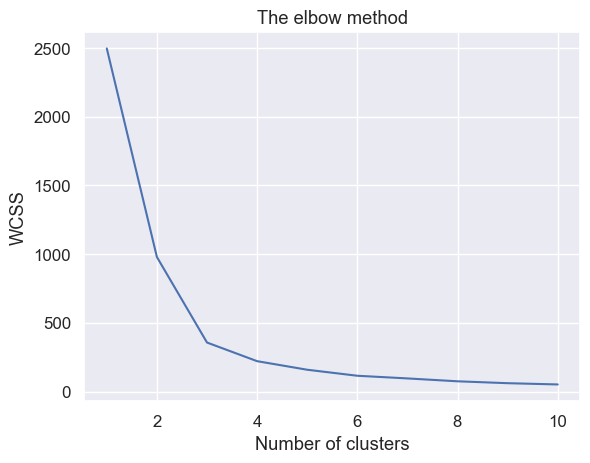

In [1425]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

#    # Non-Irish citizens usually resident and present in the State by country of citizenship 2022

With this data my purpose is to visualize the dominant citizenships in Ireland by 2022, which are the main ones and how many people there are according to this statistic.

Observing and describing data

In [1426]:
NIC

,Statistic,Census Year,Sex,UNIT,All citizenships,Austria,Belgium,Bulgaria,Croatia,Cyprus,...,Suriname,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1)
0,Non-Irish citizens usually resident and presen...,2022,Both sexes,Number,631785,1079,1581,3994,13649,207,...,1,7,2,7,4,954,55,58,8,17844
1,Non-Irish citizens usually resident and presen...,2022,Male,Number,314707,458,845,2012,7479,110,...,0,4,0,5,2,494,52,33,2,8903
2,Non-Irish citizens usually resident and presen...,2022,Female,Number,317078,621,736,1982,6170,97,...,1,3,2,2,2,460,3,25,6,8941


Strategic objective number one, see data visualization, type of information, number of rows and columns, and database weight

In [1427]:
NIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 183 entries, Statistic to Rest of the World (1)
dtypes: int64(180), object(3)
memory usage: 4.4+ KB


In [1428]:
NIC.shape

(3, 183)

In [1429]:
NIC.isnull().sum()

Statistic                                                  0
Census Year                                                0
Sex                                                        0
UNIT                                                       0
All citizenships                                           0
                                                          ..
Democratic Rep of Congo                                    0
Timor-Leste                                                0
Myanmar                                                    0
Korea (the Democratic People's Republic of) North Korea    0
Rest of the World (1)                                      0
Length: 183, dtype: int64

I review my information, I only have nominal information which are the countries and the rest is ordinal, number of people in each country.

In [1430]:
NIC.dtypes

Statistic                                                  object
Census Year                                                 int64
Sex                                                        object
UNIT                                                       object
All citizenships                                            int64
                                                            ...  
Democratic Rep of Congo                                     int64
Timor-Leste                                                 int64
Myanmar                                                     int64
Korea (the Democratic People's Republic of) North Korea     int64
Rest of the World (1)                                       int64
Length: 183, dtype: object

Delating columns from the data frame that will not be used for the analysis of this data.

In [1431]:
NIC= NIC.drop(columns=['Statistic','Census Year','UNIT','All citizenships'])
NIC.head()

,Sex,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,...,Suriname,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1)
0,Both sexes,1079,1581,3994,13649,207,4530,935,1892,1061,...,1,7,2,7,4,954,55,58,8,17844
1,Male,458,845,2012,7479,110,2226,497,741,339,...,0,4,0,5,2,494,52,33,2,8903
2,Female,621,736,1982,6170,97,2304,438,1151,722,...,1,3,2,2,2,460,3,25,6,8941


Because there are very long column names, I renamed them in order to have fewer characters in the headers and use them as labels for the graphs. 

In [1432]:
NIC=NIC.rename (columns= {'United Kingdom of Great Britain and Northern Ireland (the)':'UK','United States of America (the)':'USA','Netherlands (the)':'Netherlands'})
NIC

,Sex,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,...,Suriname,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1)
0,Both sexes,1079,1581,3994,13649,207,4530,935,1892,1061,...,1,7,2,7,4,954,55,58,8,17844
1,Male,458,845,2012,7479,110,2226,497,741,339,...,0,4,0,5,2,494,52,33,2,8903
2,Female,621,736,1982,6170,97,2304,438,1151,722,...,1,3,2,2,2,460,3,25,6,8941


I have 3 rows and 179 columns, which indicates that I have 179 nationalities in this database, I must determine some strategy to eliminate some nationalities and to be able to plot them in a way that I can better appreciate the most predominant countries in Ireland. 

In [1433]:
NIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 179 entries, Sex to Rest of the World (1)
dtypes: int64(178), object(1)
memory usage: 4.3+ KB


In [1434]:
NIC.shape

(3, 179)

I check that my information is not dirty and I have all the information, I have no missing information.

In [1435]:
NIC.notnull()

,Sex,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,...,Suriname,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1)
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


I create a copy since in my base I have, both sexes, male and female, in this first analysis I would like to work with the totals of each nationality (both sexes) and then see the analysis of male and female of each nationality.

In [1436]:
NIC_1=NIC.copy()

In [1437]:
NIC = NIC.drop(NIC.index[[1,2]],
               axis=0)
NIC.head()

,Sex,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,...,Suriname,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1)
0,Both sexes,1079,1581,3994,13649,207,4530,935,1892,1061,...,1,7,2,7,4,954,55,58,8,17844


# Change of dataframe position

In order to better manipulate my data I will transpose my rows but as seen in class in this first analysis I will use the .melt function to do so.

In [1438]:
NIC_2=NIC.melt(var_name="Country",value_name="People")
NIC_2

,Country,People
0,Sex,Both sexes
1,Austria,1079
2,Belgium,1581
3,Bulgaria,3994
4,Croatia,13649
...,...,...
174,Democratic Rep of Congo,954
175,Timor-Leste,55
176,Myanmar,58
177,Korea (the Democratic People's Republic of) No...,8


In [1439]:
NIC_2 = NIC_2.drop(NIC_2.index[[0]],
               axis=0)
NIC_2.head()

,Country,People
1,Austria,1079
2,Belgium,1581
3,Bulgaria,3994
4,Croatia,13649
5,Cyprus,207


I have a total of 631785 that I got thanks to the .sum function, this tells me that I have 631785 people of other non-Irish nationalities in 2022 in the country.

In [1440]:
Total=NIC_2.sum()
Total

Country    AustriaBelgiumBulgariaCroatiaCyprusCzechiaDenm...
People                                                631785
dtype: object

For a better visualization I order from highest to lowest as a query and then I change it in the base to be able to work with that filtered information. 

In [1441]:
print(NIC_2.sort_values(by=['People'],ascending=[False]))

              Country People
20             Poland  93680
27                 UK  83347
95              India  45449
22            Romania  43323
16          Lithuania  31177
..                ...    ...
130      Turkmenistan      5
173  Papua New Guinea      4
129        Tajikistan      4
171             Gabon      2
169          Suriname      1

[178 rows x 2 columns]


In [1442]:
NIC_2.sort_values(by=['People'],ascending=[False],inplace=True)

In [1443]:
NIC_2.head()

,Country,People
20,Poland,93680
27,UK,83347
95,India,45449
22,Romania,43323
16,Lithuania,31177


In [1444]:
NIC_2.Country

20               Poland
27                   UK
95                India
22              Romania
16            Lithuania
             ...       
130        Turkmenistan
173    Papua New Guinea
129          Tajikistan
171               Gabon
169            Suriname
Name: Country, Length: 178, dtype: object

In [1445]:
NIC_2.info

<bound method DataFrame.info of               Country People
20             Poland  93680
27                 UK  83347
95              India  45449
22            Romania  43323
16          Lithuania  31177
..                ...    ...
130      Turkmenistan      5
173  Papua New Guinea      4
129        Tajikistan      4
171             Gabon      2
169          Suriname      1

[178 rows x 2 columns]>

# Key data on the foreign population in Ireland 

To filter the nationalities with greater presence in the country, I wanted to work with those with greater volume, so I consulted the mean of 3549.35

In [1446]:
NIC_2['People'].mean()

3549.35393258427

As well as the maximum, which indicates that the nationality with the most people in Ireland is of 93680

In [1447]:
NIC_2['People'].max()

93680

And the minimum, which indicates that there is only one person in Ireland from that country on my base. 

In [1448]:
NIC_2['People'].min()

1

In order to be able to extract the nationalities with the highest volume, I consult which ones are higher than the average of 3549.36,which indicates to me that of the 178 only 26 are above average 

In [1449]:
first_26= NIC_2[NIC_2['People']>3549.36]
first_26.head()

,Country,People
20,Poland,93680
27,UK,83347
95,India,45449
22,Romania,43323
16,Lithuania,31177


In [1450]:
first_26.shape

(26, 2)

And I do the same to see which are better than the average, which as a difference of 178-26 the result is 152.

In [1451]:
rest= NIC_2[NIC_2['People']<3549.36]
rest.head()

,Country,People
136,Canada,3528
165,Australia,3481
101,Malaysia,3407
110,Syrian Arab Republic (the),3267
31,Moldova (the Republic of),3119


In [1452]:
rest.shape

(152, 2)

In order to be able to graph and not lose any information I would like to add another row with the totals of the countries below the average so I consult the .sum of those countries. 

In [1453]:
rest.sum()

Country    CanadaAustraliaMalaysiaSyrian Arab Republic (t...
People                                                 84600
dtype: object

In [1454]:
rest_total=rest['People'].sum()
rest_total

84600

In [1455]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 136 to 169
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  152 non-null    object
 1   People   152 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


# Top 26 nationalities in Ireland 

In my list of the first 26 (most predominant nationalities) there is one with the title 'Rest of the World(1)' that includes other nationalities that were not included in the base (in addition to the first 178).

I will eliminate that row to add it with the previous total of the countries below the average and be able to integrate a new row with the final total to be able to graph

In [1456]:
first_26

,Country,People
20,Poland,93680
27,UK,83347
95,India,45449
22,Romania,43323
16,Lithuania,31177
135,Brazil,27338
14,Italy,18319
15,Latvia,18300
25,Spain,17953
178,Rest of the World (1),17844


In [1457]:
Rest_of_the_World=17844
Rest_of_the_World

17844

In [1458]:
first_26 = first_26.drop(first_26.index[[9]],
               axis=0)
first_26.head()

,Country,People
20,Poland,93680
27,UK,83347
95,India,45449
22,Romania,43323
16,Lithuania,31177


As an additional procedure, just to confirm that the information is correct, I will perform a mathematical operation.

According to official data (bases analyzed previously), the 2022 population was 5184 (Thousand)  of which the non-Irish population was 631785.

In [1459]:
Population_2022

5184

In [1460]:
#Total of migrants in 2022 (631785)

The total base of nationalities with the greatest presence 'first_26' is 529341

In [1461]:
first_26['People'].sum()

529341

In [1462]:
first_26.sum()

Country    PolandUKIndiaRomaniaLithuaniaBrazilItalyLatvia...
People                                                529341
dtype: object

In [1463]:
first_26_total=first_26['People'].sum()
first_26_total

529341

Therefore, according to the saved data, I verify that the information is correct since I check if
Total==first_26_total+rest_total+Rest_of_the_World

Total = Non-Irish citizens usually resident total  in 2022

first_26= Nationalized with greater presence

rest_total= nationalidas (152) below the average

Rest_of_the_World= Additional nationalities that were not included in the original database

In [1464]:
Total==first_26_total+rest_total+Rest_of_the_World

Country    False
People      True
dtype: bool

In [1465]:
Total

Country    AustriaBelgiumBulgariaCroatiaCyprusCzechiaDenm...
People                                                631785
dtype: object

I will integrate an additional row to my df of first_26 with the remaining countries that have quantities less than the average

In [1466]:
rest_total+Rest_of_the_World

102444

In [1467]:
Rest_countries={"Country": "Rest of the World","People":102444}

first_26 = first_26.append( Rest_countries, ignore_index=True)

first_26

,Country,People
0,Poland,93680
1,UK,83347
2,India,45449
3,Romania,43323
4,Lithuania,31177
5,Brazil,27338
6,Italy,18319
7,Latvia,18300
8,Spain,17953
9,France,13893


In [1468]:
first_26.sort_values(by=['People'],ascending=[False],inplace=True)
first_26

,Country,People
25,Rest of the World,102444
0,Poland,93680
1,UK,83347
2,India,45449
3,Romania,43323
4,Lithuania,31177
5,Brazil,27338
6,Italy,18319
7,Latvia,18300
8,Spain,17953


Now that I have the final data, I would like to visualize it better with a bar chart since I want to compare the number of people from each country in Ireland. 

In [1469]:
#Bar graph. Matplotlib

In [1470]:
x = first_26['Country']
y = first_26['People']

Text(0.5, 0, 'Country')

Text(0, 0.5, 'People')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<BarContainer object of 26 artists>

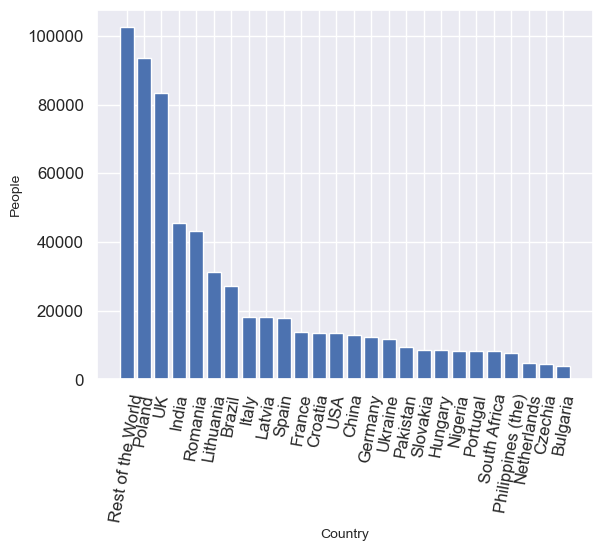

In [1471]:
plt.xlabel('Country',fontsize=10)
plt.ylabel('People',fontsize=10)
plt.xticks(rotation=80)

plt.bar(x,y)

In [1472]:
#Bar graph. Seaborn

[Text(0, 0, 'Rest of the World'),
 Text(1, 0, 'Poland'),
 Text(2, 0, 'UK'),
 Text(3, 0, 'India'),
 Text(4, 0, 'Romania'),
 Text(5, 0, 'Lithuania'),
 Text(6, 0, 'Brazil'),
 Text(7, 0, 'Italy'),
 Text(8, 0, 'Latvia'),
 Text(9, 0, 'Spain'),
 Text(10, 0, 'France'),
 Text(11, 0, 'Croatia'),
 Text(12, 0, 'USA'),
 Text(13, 0, 'China'),
 Text(14, 0, 'Germany'),
 Text(15, 0, 'Ukraine'),
 Text(16, 0, 'Pakistan'),
 Text(17, 0, 'Slovakia'),
 Text(18, 0, 'Hungary'),
 Text(19, 0, 'Nigeria'),
 Text(20, 0, 'Portugal'),
 Text(21, 0, 'South Africa'),
 Text(22, 0, 'Philippines (the)'),
 Text(23, 0, 'Netherlands'),
 Text(24, 0, 'Czechia'),
 Text(25, 0, 'Bulgaria')]

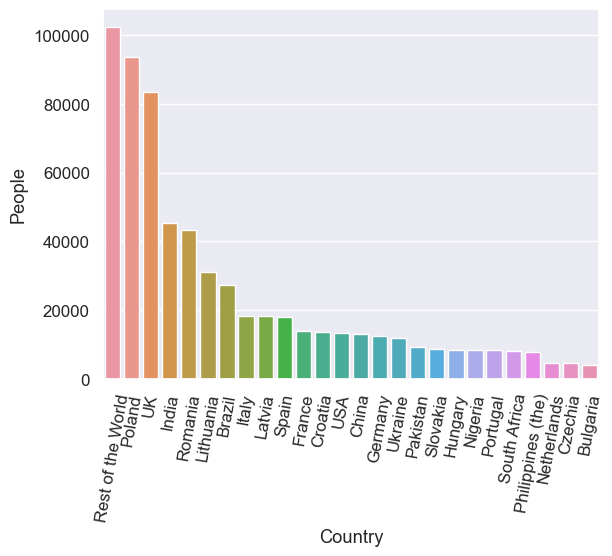

In [1473]:
ax = sns.barplot(x='Country', y='People', data=first_26) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

# Percentage of the total value of the population 

Added two additional columns to see what percentage each nationality represents of the total population of 2022, considering that according to statistics the total population (Irish and non-Irish) was 5,184,000 people.

#total population of 2022 = 5 184 000 people

#2022=5 184 000

#Non-Irish citizens usually resident and present in the State = 631 785
#Non-Irish citizens usually resident and present in the State = Total

#Percentage of total population 2022 = %Pupulation2022

#Percentage=((('Number of migrants')/5184000)*100)

In [1474]:
Population_2022

5184

In [1475]:
first_26['Population2022'] = first_26['People']/5184000
                      
first_26.head()

,Country,People,Population2022
25,Rest of the World,102444,0.019762
0,Poland,93680,0.018071
1,UK,83347,0.016078
2,India,45449,0.008767
3,Romania,43323,0.008357


In [1476]:
first_26['%Population2022'] = first_26['Population2022']*100
first_26

,Country,People,Population2022,%Population2022
25,Rest of the World,102444,0.019762,1.976157
0,Poland,93680,0.018071,1.807099
1,UK,83347,0.016078,1.607774
2,India,45449,0.008767,0.876717
3,Romania,43323,0.008357,0.835706
4,Lithuania,31177,0.006014,0.601408
5,Brazil,27338,0.005274,0.527353
6,Italy,18319,0.003534,0.353376
7,Latvia,18300,0.00353,0.353009
8,Spain,17953,0.003463,0.346316


In [1477]:
first_26.sum()

Country            Rest of the WorldPolandUKIndiaRomaniaLithuania...
People                                                        631785
Population2022                                              0.121872
%Population2022                                            12.187211
dtype: object

In [1479]:
Foreigners  = 631785
Irish = 5184000

In [1482]:
Irish_national= Irish/Foreigners 
Irish_national

8.20532301336689

In [1487]:
country = input("Please write the country where you were born:\n")

if country == "Ireland":
    print("You are part of the 82.05% of the total population in Ireland")
elif country == "Poland":
    print("You are part of the 18.07% of the total population in the country.")
elif country == "UK":
    print("You are part of the 16.07% of the total population in the country.")
elif country == "India":
    print("You are part of the 8.77% of the total population in the country.")
elif country == "Romania":
    print("You are part of the 8.35% of the total population in the country.")
elif country == "Lithuania":
    print("You are part of the 6.01% of the total population in the country.")
elif country == "Brazil":
    print("You are part of the 5.27% of the total population in the country.")
elif country == "Italy":
    print("You are part of the 3.53% of the total population in the country.")
elif country == "Latvia":
    print("You are part of the 3.53% of the total population in the country.")
elif country == "Spain":
    print("You are part of the 3.46% of the total population in the country.")
    
else:
    print("This country is not part of the 10 countries with the largest number of people living in ireland. .")

Please write the country where you were born:
Ireland
You are part of the 82.05% of the total population in Ireland


## References:

https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
https://scikit-learn.org/stable/index.html
https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html
https://www.w3schools.com/python/numpy/numpy_array_shape.asp
https://seaborn.pydata.org/generated/seaborn.barplot.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://scipy-lectures.org/packages/scikit-learn/index.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

# GITHUB Link

https://github.com/diagarmar29/Population-in-Ireland.-1st-Assesment/blob/main/Population%20in%20Ireland.ipynb